In [3]:
##Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
import warnings

In [4]:
## reading the file
AL_TES= pd.read_csv("Alabama.csv", index_col="DATE")
AL_TES

,STATION,NAME,STATE,REGION,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,,,,,,,
2008-01-01,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,47.0,64.0,30.0
2008-01-02,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,37.5,48.0,27.0
2008-01-03,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,26.5,34.0,19.0
2008-01-04,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,28.5,39.0,18.0
2008-01-05,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,36.0,53.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,USC00010260,"LEXINGTON, AL US",ALABAMA,SOUTH,34.96285,-87.37195,231.6,0.0,0.0,0.0,28.5,34.0,23.0
2022-12-28,USC00010260,"LEXINGTON, AL US",ALABAMA,SOUTH,34.96285,-87.37195,231.6,0.0,0.0,0.0,34.5,45.0,24.0
2022-12-29,USC00010260,"LEXINGTON, AL US",ALABAMA,SOUTH,34.96285,-87.37195,231.6,0.0,0.0,0.0,45.0,59.0,31.0


In [5]:
AL_TES.isnull().sum()

STATION      0
NAME         0
STATE        0
REGION       0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
PRCP         0
SNOW         0
SNWD         0
TAVG         0
TMAX         0
TMIN         0
dtype: int64

In [6]:
# Check for missing value defined in data documentation
AL_TES.apply(lambda x: (x == 9999).sum())

STATION      0
NAME         0
STATE        0
REGION       0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
PRCP         0
SNOW         0
SNWD         0
TAVG         0
TMAX         0
TMIN         0
dtype: int64

In [7]:
# Convert 'DATE' to datetime format
AL_TES.index = pd.to_datetime(AL_TES.index)

In [8]:
AL_TES.index

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-05', '2008-01-06', '2008-01-07', '2008-01-08',
               '2008-01-09', '2008-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=111873, freq=None)

In [9]:
AL_TES.head()

,STATION,NAME,STATE,REGION,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,,,,,,,
2008-01-01,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.8347,-88.1341,38.1,0.0,0.0,0.0,47.0,64.0,30.0
2008-01-02,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.8347,-88.1341,38.1,0.0,0.0,0.0,37.5,48.0,27.0
2008-01-03,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.8347,-88.1341,38.1,0.0,0.0,0.0,26.5,34.0,19.0
2008-01-04,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.8347,-88.1341,38.1,0.0,0.0,0.0,28.5,39.0,18.0
2008-01-05,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.8347,-88.1341,38.1,0.0,0.0,0.0,36.0,53.0,19.0


In [10]:
# Selecting all numeric columns for time series analysis

AL_TES_num = AL_TES[['PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'LATITUDE', 'LONGITUDE']]
AL_TES_num.head(3)

,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
DATE,,,,,,,,
2008-01-01,0.0,0.0,0.0,47.0,64.0,30.0,32.8347,-88.1341
2008-01-02,0.0,0.0,0.0,37.5,48.0,27.0,32.8347,-88.1341
2008-01-03,0.0,0.0,0.0,26.5,34.0,19.0,32.8347,-88.1341


In [11]:
AL_TES_num = AL_TES_num.sort_values(by='DATE')

<Axes: xlabel='DATE'>

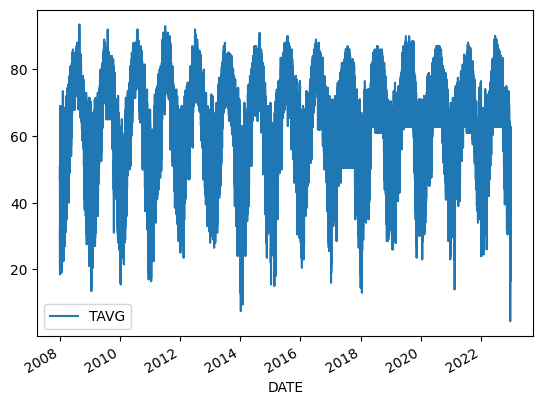

In [12]:
##plotting TAVG to understand the distribution

AL_TES_num[['TAVG']].plot()

In [13]:
from sklearn.model_selection import train_test_split

# Extracting features (all columns except 'TAVG') and target variable
X = AL_TES_num.drop('TAVG', axis=1)
y = AL_TES_num['TAVG']

# Splitting the data into training and testing sets (80% train, 20% test)
train_size = int(len(y) * 0.8)
X_train, X_test = X.iloc[:train_size, :], X.iloc[train_size:, :]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Check the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (89498, 7) (89498,)
Testing set shape: (22375, 7) (22375,)


In [14]:
# Set parameters
alphas = [0.7, 0.8, 0.9]
betas = [0.3, 0.2, 0.1]
seasonal_period = 12

Forecast for 2023 (alpha=0.7, beta=0.3):
2023-01-01    67.949631
2023-01-02    66.468490
2023-01-03    67.300803
2023-01-04    67.165560
2023-01-05    67.365745
                ...    
2023-12-27    67.738532
2023-12-28    67.500531
2023-12-29    67.628890
2023-12-30    66.790901
2023-12-31    66.140853
Freq: D, Length: 365, dtype: float64


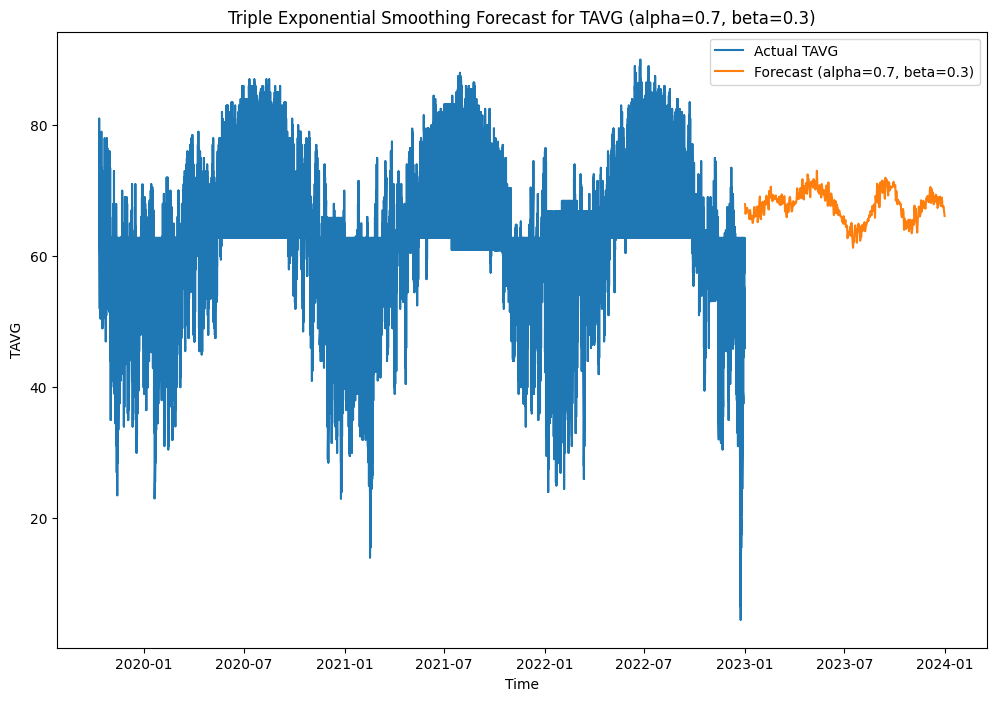

Forecast for 2023 (alpha=0.7, beta=0.2):
2023-01-01    67.949631
2023-01-02    66.468490
2023-01-03    67.300803
2023-01-04    67.165560
2023-01-05    67.365745
                ...    
2023-12-27    67.738532
2023-12-28    67.500531
2023-12-29    67.628890
2023-12-30    66.790901
2023-12-31    66.140853
Freq: D, Length: 365, dtype: float64


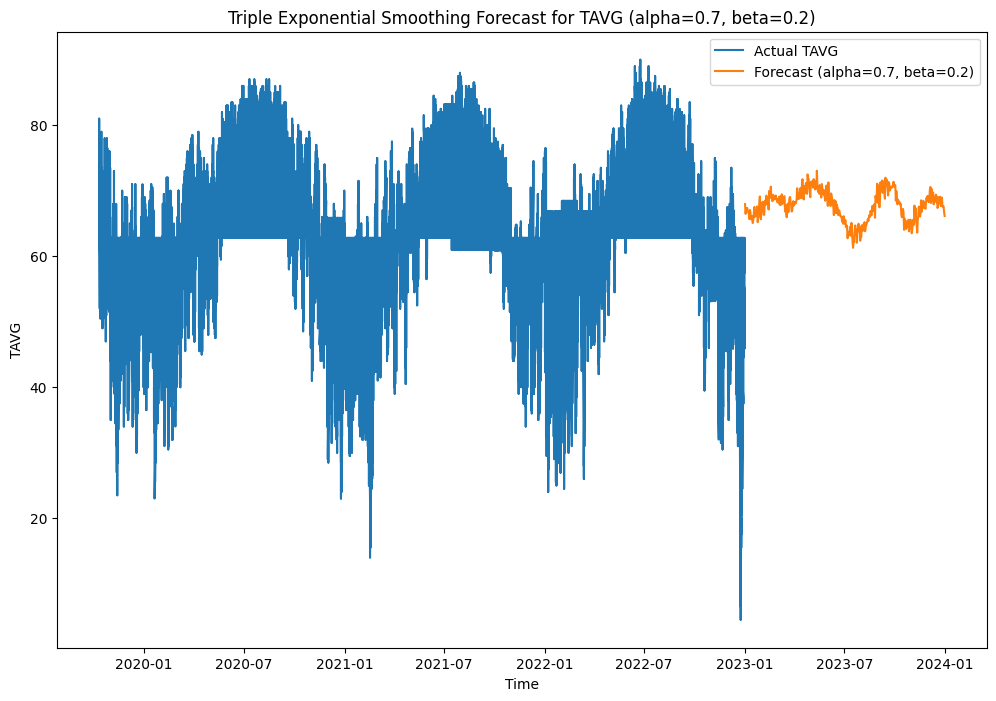

Forecast for 2023 (alpha=0.7, beta=0.1):
2023-01-01    67.949631
2023-01-02    66.468490
2023-01-03    67.300803
2023-01-04    67.165560
2023-01-05    67.365745
                ...    
2023-12-27    67.738532
2023-12-28    67.500531
2023-12-29    67.628890
2023-12-30    66.790901
2023-12-31    66.140853
Freq: D, Length: 365, dtype: float64


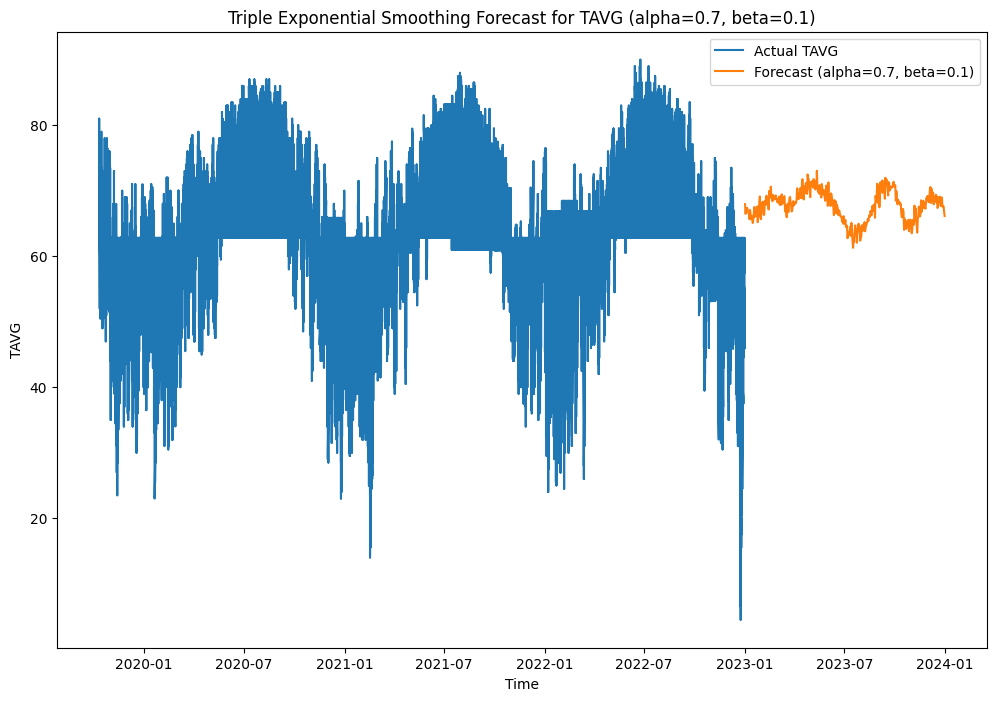

Forecast for 2023 (alpha=0.8, beta=0.3):
2023-01-01    66.864595
2023-01-02    65.350679
2023-01-03    66.095930
2023-01-04    65.895818
2023-01-05    66.124163
                ...    
2023-12-27    66.405152
2023-12-28    66.254854
2023-12-29    66.455192
2023-12-30    65.681624
2023-12-31    65.128767
Freq: D, Length: 365, dtype: float64


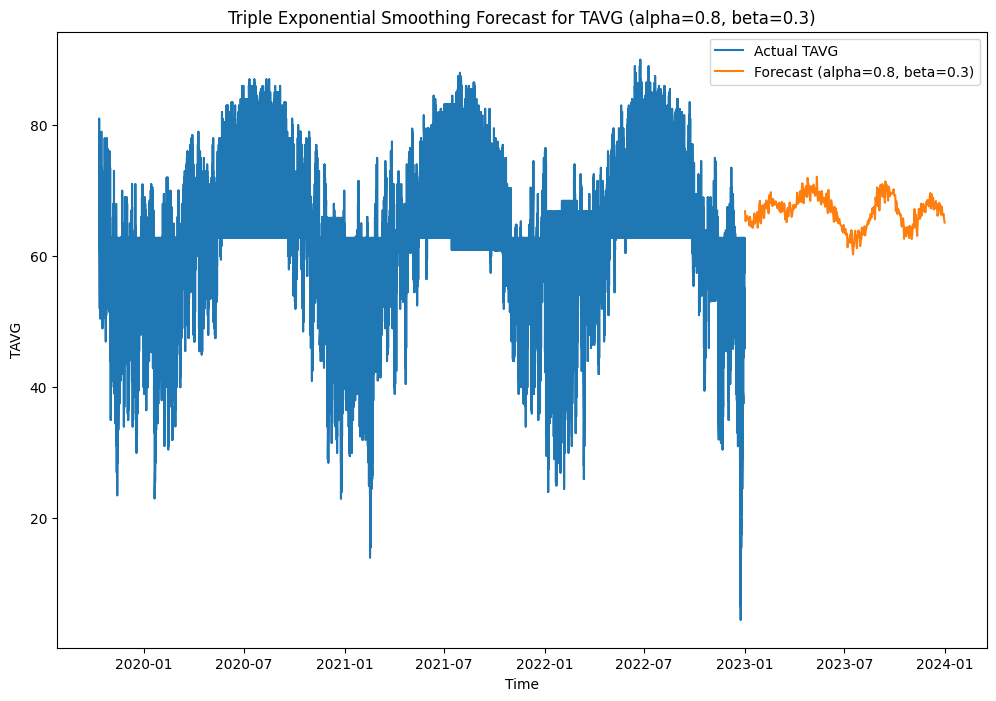

Forecast for 2023 (alpha=0.8, beta=0.2):
2023-01-01    66.864595
2023-01-02    65.350679
2023-01-03    66.095930
2023-01-04    65.895818
2023-01-05    66.124163
                ...    
2023-12-27    66.405152
2023-12-28    66.254854
2023-12-29    66.455192
2023-12-30    65.681624
2023-12-31    65.128767
Freq: D, Length: 365, dtype: float64


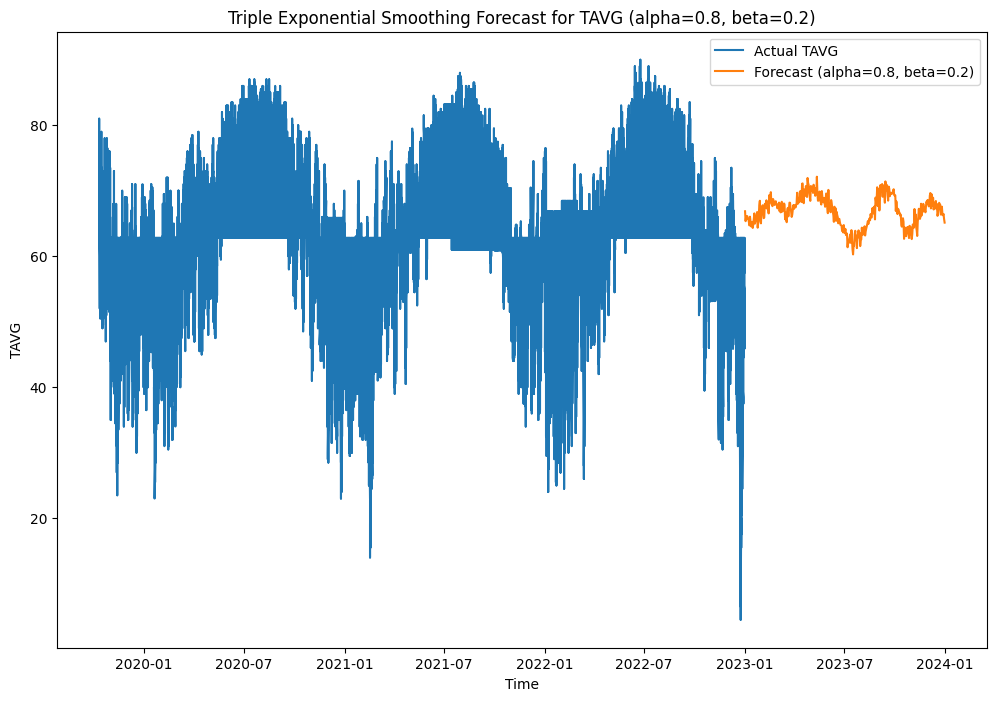

Forecast for 2023 (alpha=0.8, beta=0.1):
2023-01-01    66.864595
2023-01-02    65.350679
2023-01-03    66.095930
2023-01-04    65.895818
2023-01-05    66.124163
                ...    
2023-12-27    66.405152
2023-12-28    66.254854
2023-12-29    66.455192
2023-12-30    65.681624
2023-12-31    65.128767
Freq: D, Length: 365, dtype: float64


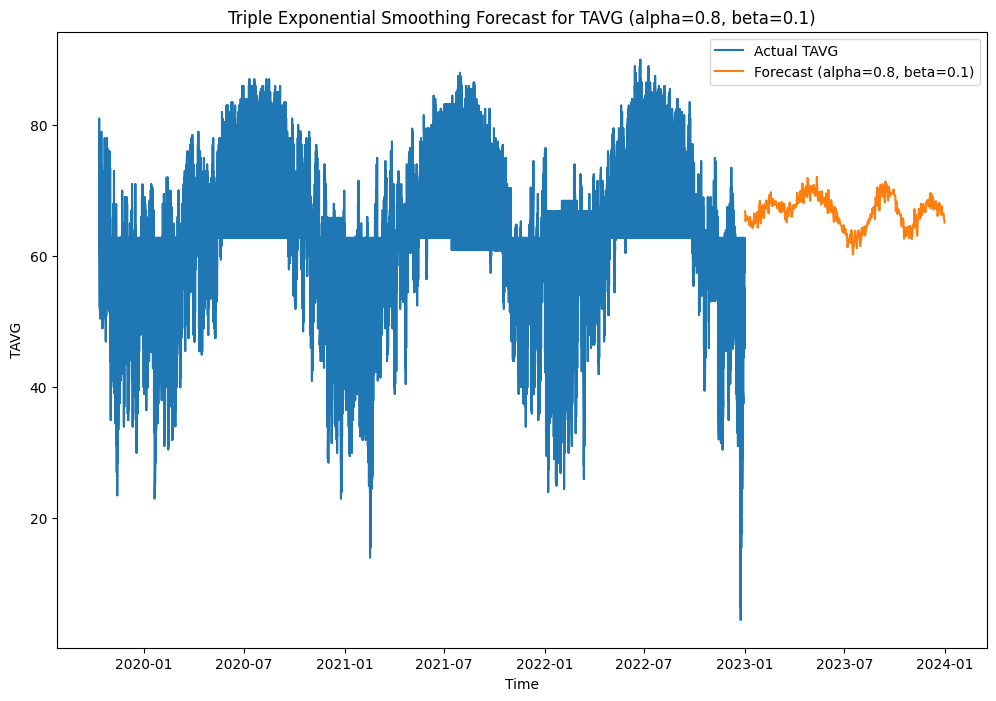

Forecast for 2023 (alpha=0.9, beta=0.3):
2023-01-01    65.430333
2023-01-02    63.934947
2023-01-03    64.489097
2023-01-04    64.383932
2023-01-05    64.752816
                ...    
2023-12-27    65.612245
2023-12-28    65.343000
2023-12-29    65.465985
2023-12-30    64.529877
2023-12-31    63.995791
Freq: D, Length: 365, dtype: float64


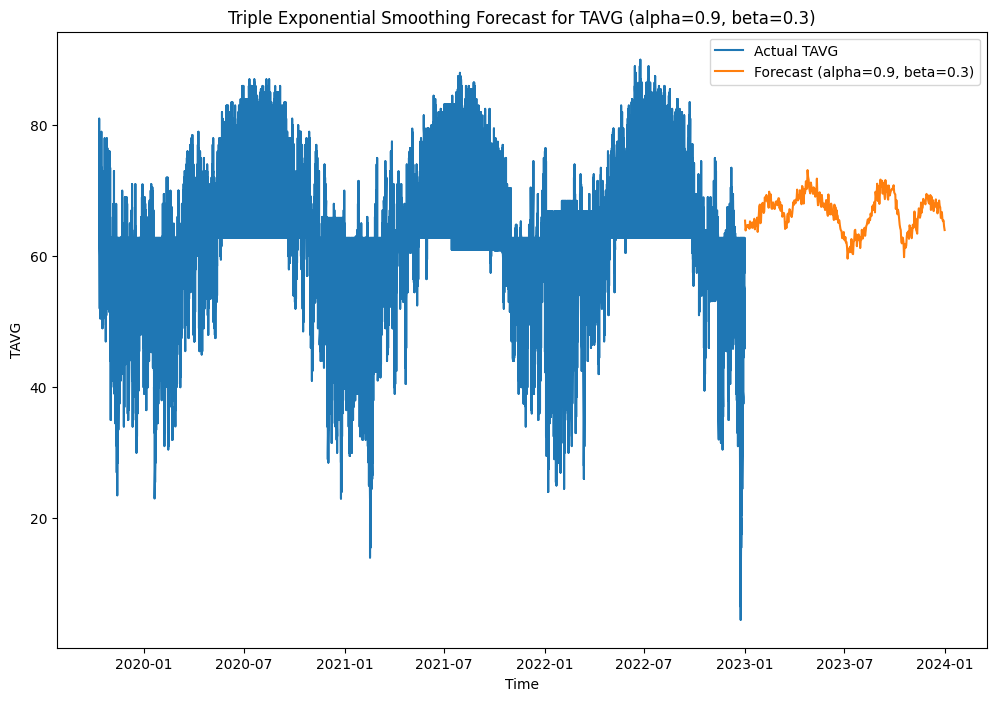

Forecast for 2023 (alpha=0.9, beta=0.2):
2023-01-01    65.430333
2023-01-02    63.934947
2023-01-03    64.489097
2023-01-04    64.383932
2023-01-05    64.752816
                ...    
2023-12-27    65.612245
2023-12-28    65.343000
2023-12-29    65.465985
2023-12-30    64.529877
2023-12-31    63.995791
Freq: D, Length: 365, dtype: float64


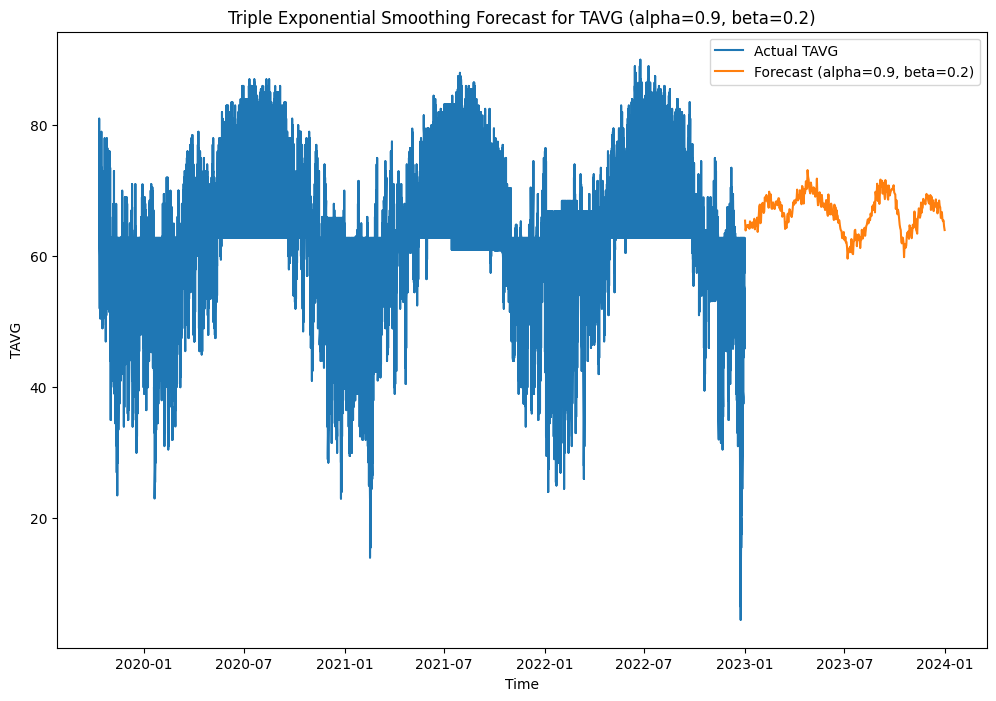

Forecast for 2023 (alpha=0.9, beta=0.1):
2023-01-01    65.430333
2023-01-02    63.934947
2023-01-03    64.489097
2023-01-04    64.383932
2023-01-05    64.752816
                ...    
2023-12-27    65.612245
2023-12-28    65.343000
2023-12-29    65.465985
2023-12-30    64.529877
2023-12-31    63.995791
Freq: D, Length: 365, dtype: float64


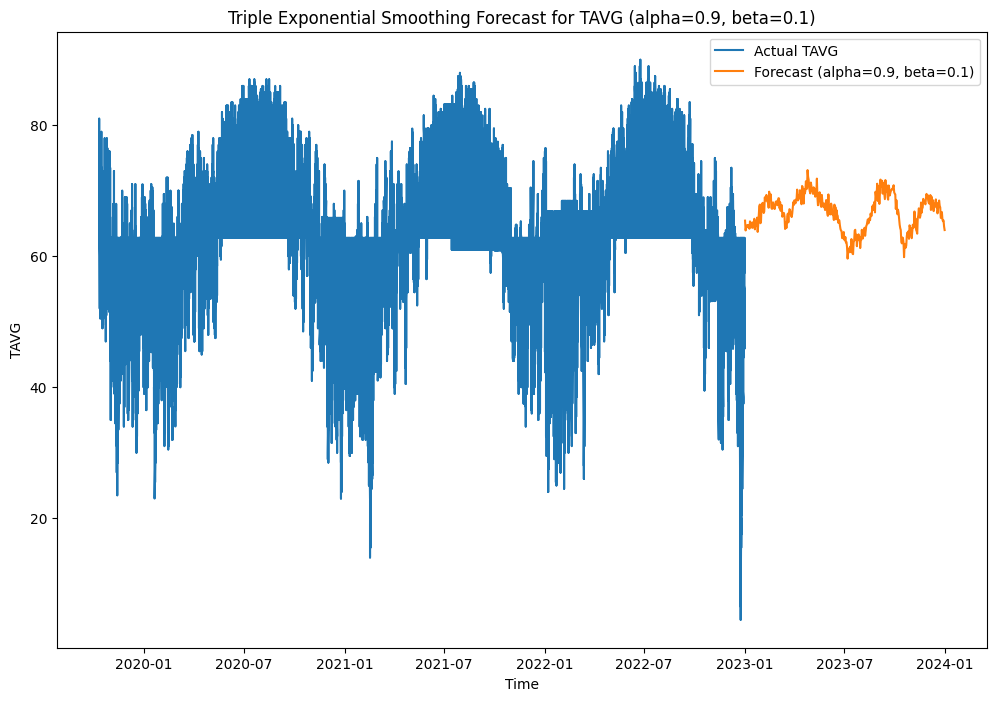

In [15]:
warnings.filterwarnings("ignore")

# Iterate over each combination of alpha and beta values
for alpha in alphas:
    for beta in betas:
        # Train the Triple Exponential Smoothing model on the training set
        model = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=365)
        results = model.fit(smoothing_level=alpha, smoothing_slope=beta)

        # Forecast for 2023
        forecast_steps_2023 = 365
        forecast_2023 = results.forecast(steps=forecast_steps_2023)

        # Set the forecast index to cover the period for 2023
        forecast_index_2023 = pd.date_range(start=y_test.index[-1] + pd.Timedelta(days=1), periods=forecast_steps_2023)
        forecast_2023.index = forecast_index_2023

        # # Print the forecasted values for 2023
        print(f'Forecast for 2023 (alpha={alpha}, beta={beta}):')
        print(forecast_2023)

# Plot the actual values, and forecast for 2023
        plt.figure(figsize=(12, 8))
        plt.plot(y_test.index, y_test, label='Actual TAVG')
        plt.plot(forecast_2023.index, forecast_2023.iloc[:len(y_test)], label=f'Forecast (alpha={alpha}, beta={beta})')  # Ensure the correct length
        # Set title, labels, and legend for the current combination of alpha and beta
        plt.title(f'Triple Exponential Smoothing Forecast for TAVG (alpha={alpha}, beta={beta})')
        plt.xlabel('Time')
        plt.ylabel('TAVG')
        plt.legend()
        plt.show()

In [16]:
import itertools

# List of alpha and beta values to try
alphas = [0.7, 0.8, 0.9]
betas = [0.3, 0.2, 0.1]
seasonal_period = 30

# Perform a grid search
for alpha, beta in itertools.product(alphas, betas):
    model_tes = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=seasonal_period, initialization_method="estimated").fit(smoothing_level=alpha, smoothing_trend=beta)
    forecast_tes = model_tes.forecast(steps=len(y_test))  # Use forecast_tes within the loop

    # Evaluate and print metrics for each combination of alpha and beta
    mae = mean_absolute_error(y_test, forecast_tes)
    mse = mean_squared_error(y_test, forecast_tes)
    mape = np.mean(np.abs((y_test.values - forecast_tes.values) / y_test.values)) * 100
    
    print(f"Alpha: {alpha}, Beta: {beta}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%\n")


Alpha: 0.7, Beta: 0.3
Mean Absolute Error: 90835.6343070513
Mean Squared Error: 11000735538.746124
Mean Absolute Percentage Error (MAPE): 152495.03%

Alpha: 0.7, Beta: 0.2
Mean Absolute Error: 11175.417485289243
Mean Squared Error: 166573467.85749796
Mean Absolute Percentage Error (MAPE): 18755.79%

Alpha: 0.7, Beta: 0.1
Mean Absolute Error: 5170.989713594604
Mean Squared Error: 35677615.82992187
Mean Absolute Percentage Error (MAPE): 8675.16%

Alpha: 0.8, Beta: 0.3
Mean Absolute Error: 21715.42803035674
Mean Squared Error: 628676639.9434687
Mean Absolute Percentage Error (MAPE): 36451.33%

Alpha: 0.8, Beta: 0.2
Mean Absolute Error: 14212.392873158185
Mean Squared Error: 269375391.70156837
Mean Absolute Percentage Error (MAPE): 23854.50%

Alpha: 0.8, Beta: 0.1
Mean Absolute Error: 5975.173366504024
Mean Squared Error: 47630363.97298918
Mean Absolute Percentage Error (MAPE): 10025.29%

Alpha: 0.9, Beta: 0.3
Mean Absolute Error: 20477.548381977427
Mean Squared Error: 558880689.6720217
Me

<Axes: xlabel='DATE'>

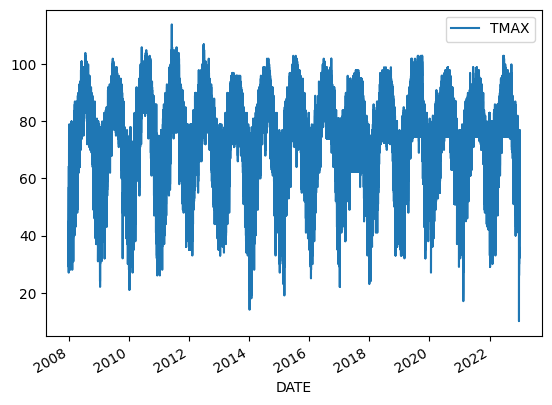

In [17]:
##plotting TMAX to understand the distribution

AL_TES_num[['TMAX']].plot()

In [18]:
# Extracting features (all columns except 'TAVG') and target variable
X = AL_TES_num.drop('TMAX', axis=1)
y = AL_TES_num['TMAX']

# Splitting the data into training and testing sets (80% train, 20% test)
train_size = int(len(y) * 0.8)
X_train, X_test = X.iloc[:train_size, :], X.iloc[train_size:, :]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Check the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (89498, 7) (89498,)
Testing set shape: (22375, 7) (22375,)


Forecast for 2023 (alpha=0.7, beta=0.3):
2023-01-01    78.776943
2023-01-02    77.103292
2023-01-03    78.193678
2023-01-04    77.494002
2023-01-05    77.868858
                ...    
2023-12-27    79.364009
2023-12-28    78.233326
2023-12-29    78.347507
2023-12-30    77.922589
2023-12-31    77.303570
Freq: D, Length: 365, dtype: float64


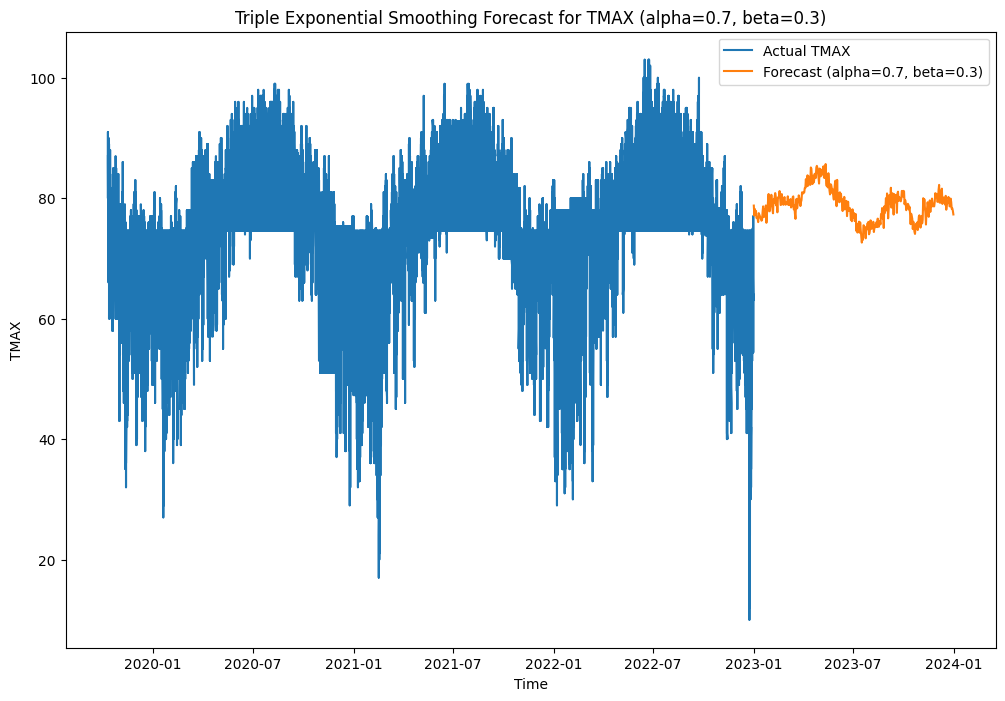

Forecast for 2023 (alpha=0.7, beta=0.2):
2023-01-01    78.776943
2023-01-02    77.103292
2023-01-03    78.193678
2023-01-04    77.494002
2023-01-05    77.868858
                ...    
2023-12-27    79.364009
2023-12-28    78.233326
2023-12-29    78.347507
2023-12-30    77.922589
2023-12-31    77.303570
Freq: D, Length: 365, dtype: float64


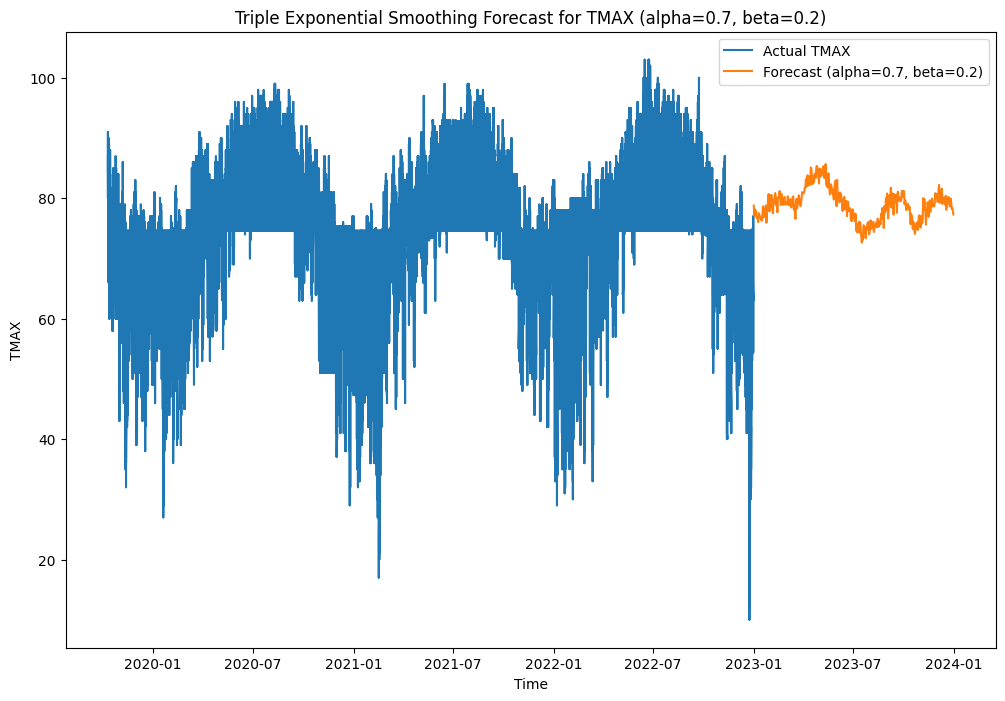

Forecast for 2023 (alpha=0.7, beta=0.1):
2023-01-01    78.776943
2023-01-02    77.103292
2023-01-03    78.193678
2023-01-04    77.494002
2023-01-05    77.868858
                ...    
2023-12-27    79.364009
2023-12-28    78.233326
2023-12-29    78.347507
2023-12-30    77.922589
2023-12-31    77.303570
Freq: D, Length: 365, dtype: float64


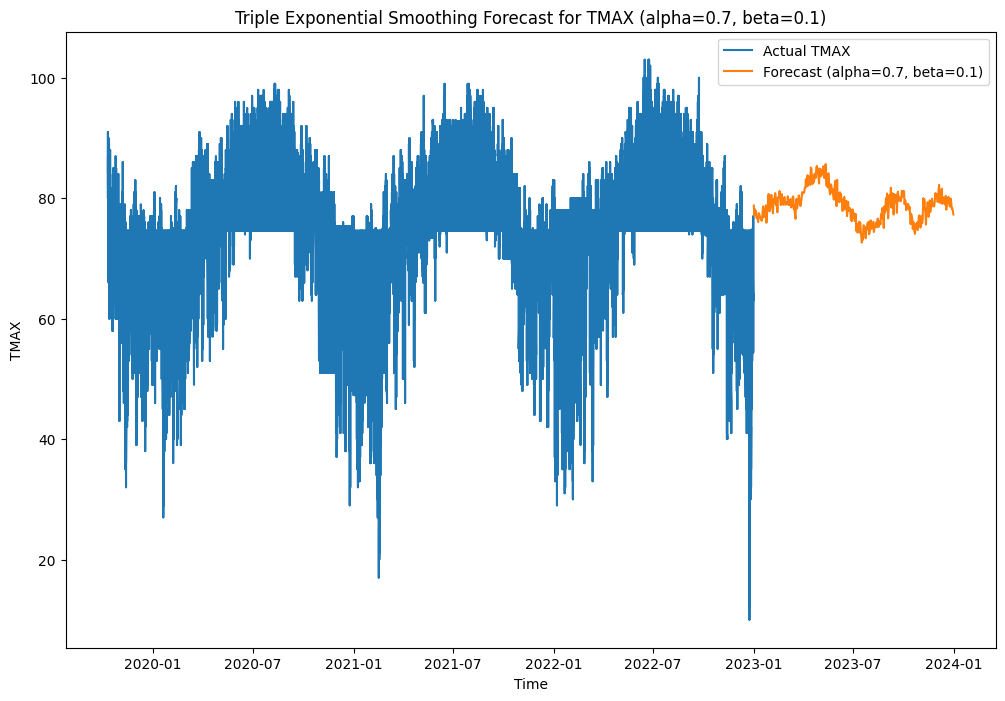

Forecast for 2023 (alpha=0.8, beta=0.3):
2023-01-01    77.681599
2023-01-02    76.117929
2023-01-03    77.099270
2023-01-04    76.358895
2023-01-05    76.813789
                ...    
2023-12-27    78.396172
2023-12-28    77.325780
2023-12-29    77.556669
2023-12-30    77.138113
2023-12-31    76.449424
Freq: D, Length: 365, dtype: float64


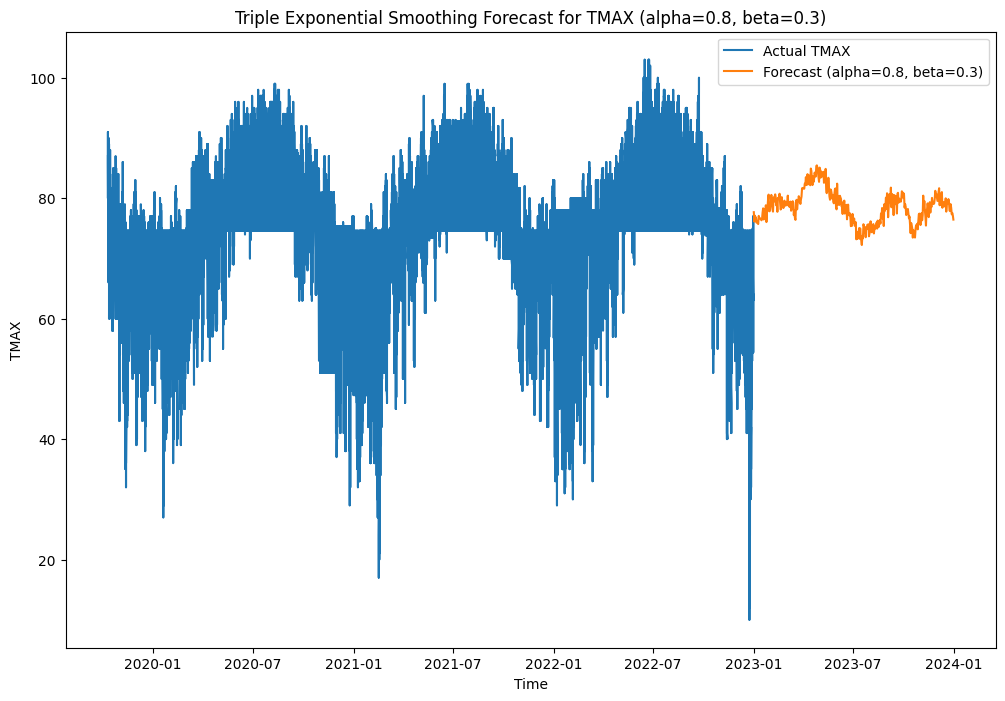

Forecast for 2023 (alpha=0.8, beta=0.2):
2023-01-01    77.681599
2023-01-02    76.117929
2023-01-03    77.099270
2023-01-04    76.358895
2023-01-05    76.813789
                ...    
2023-12-27    78.396172
2023-12-28    77.325780
2023-12-29    77.556669
2023-12-30    77.138113
2023-12-31    76.449424
Freq: D, Length: 365, dtype: float64


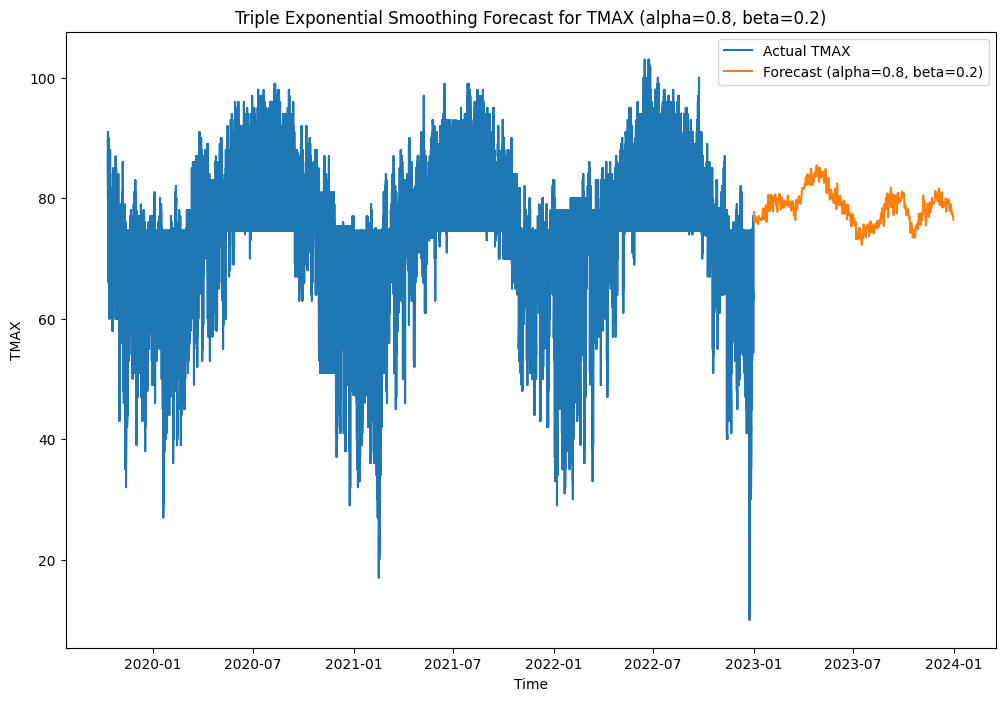

Forecast for 2023 (alpha=0.8, beta=0.1):
2023-01-01    77.681599
2023-01-02    76.117929
2023-01-03    77.099270
2023-01-04    76.358895
2023-01-05    76.813789
                ...    
2023-12-27    78.396172
2023-12-28    77.325780
2023-12-29    77.556669
2023-12-30    77.138113
2023-12-31    76.449424
Freq: D, Length: 365, dtype: float64


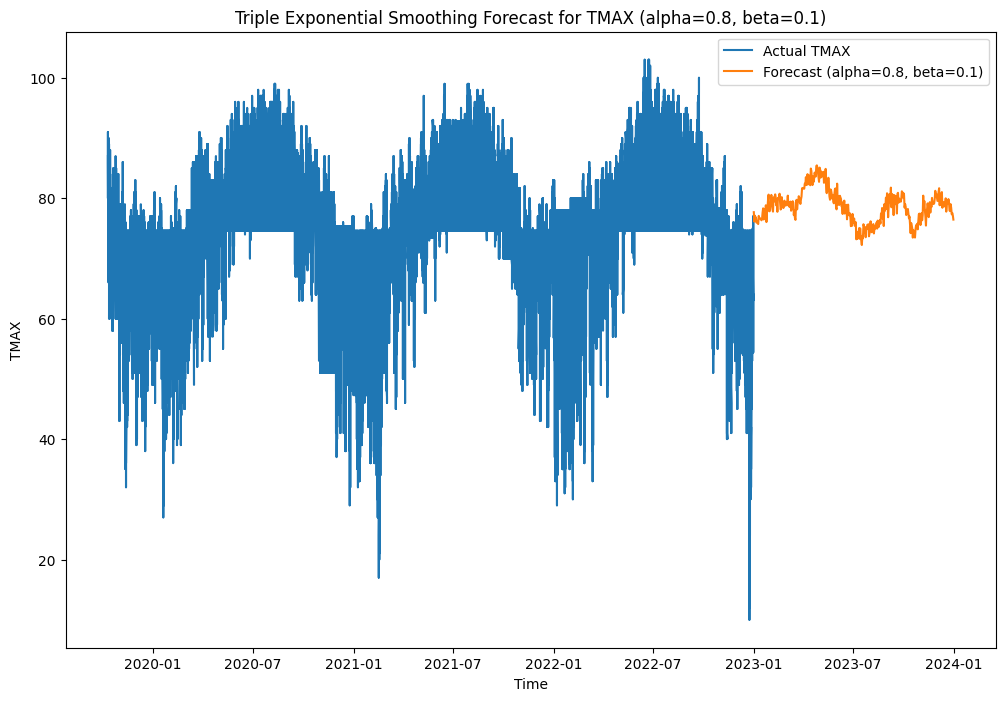

Forecast for 2023 (alpha=0.9, beta=0.3):
2023-01-01    76.680324
2023-01-02    75.241726
2023-01-03    76.211874
2023-01-04    75.437012
2023-01-05    76.006448
                ...    
2023-12-27    77.355402
2023-12-28    76.382703
2023-12-29    76.715478
2023-12-30    76.277458
2023-12-31    75.548081
Freq: D, Length: 365, dtype: float64


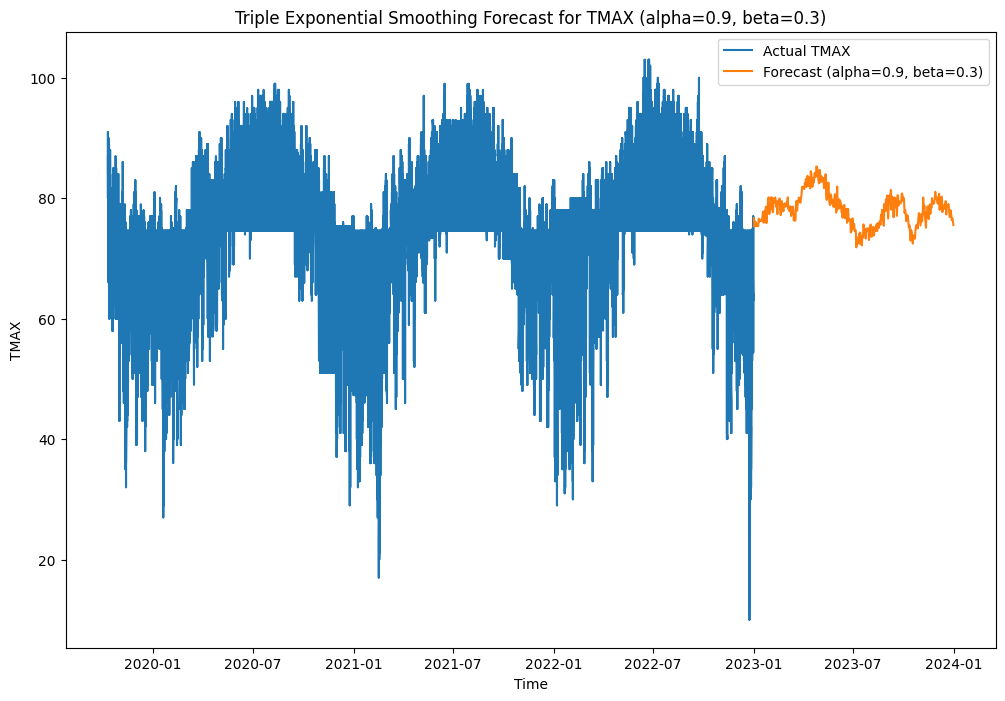

Forecast for 2023 (alpha=0.9, beta=0.2):
2023-01-01    76.680324
2023-01-02    75.241726
2023-01-03    76.211874
2023-01-04    75.437012
2023-01-05    76.006448
                ...    
2023-12-27    77.355402
2023-12-28    76.382703
2023-12-29    76.715478
2023-12-30    76.277458
2023-12-31    75.548081
Freq: D, Length: 365, dtype: float64


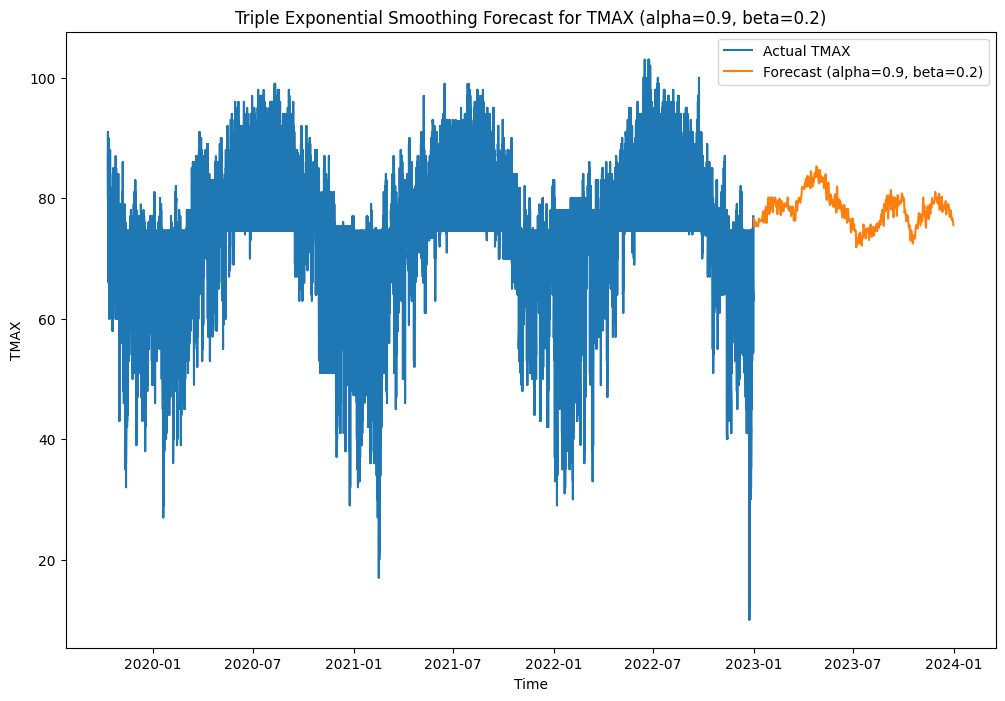

Forecast for 2023 (alpha=0.9, beta=0.1):
2023-01-01    76.680324
2023-01-02    75.241726
2023-01-03    76.211874
2023-01-04    75.437012
2023-01-05    76.006448
                ...    
2023-12-27    77.355402
2023-12-28    76.382703
2023-12-29    76.715478
2023-12-30    76.277458
2023-12-31    75.548081
Freq: D, Length: 365, dtype: float64


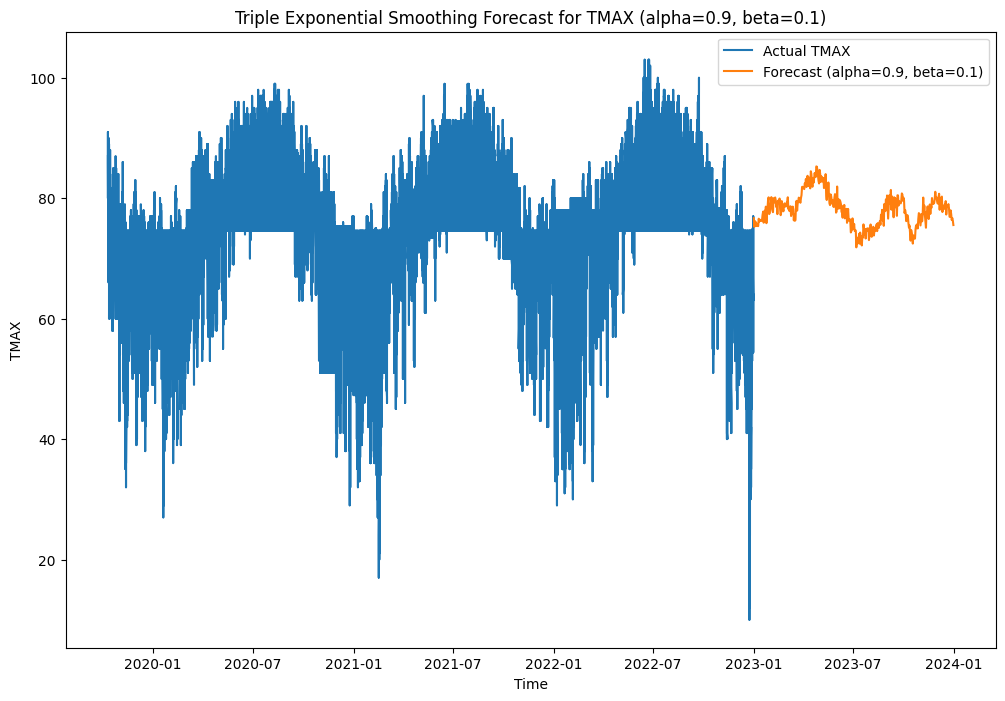

In [19]:
warnings.filterwarnings("ignore")

# Iterate over each combination of alpha and beta values
for alpha in alphas:
    for beta in betas:
        # Train the Triple Exponential Smoothing model on the training set
        model = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=365)
        results = model.fit(smoothing_level=alpha, smoothing_slope=beta)

        # Forecast for 2023
        forecast_steps_2023 = 365
        forecast_2023 = results.forecast(steps=forecast_steps_2023)

        # Set the forecast index to cover the period for 2023
        forecast_index_2023 = pd.date_range(start=y_test.index[-1] + pd.Timedelta(days=1), periods=forecast_steps_2023)
        forecast_2023.index = forecast_index_2023

        # # Print the forecasted values for 2023
        print(f'Forecast for 2023 (alpha={alpha}, beta={beta}):')
        print(forecast_2023)

# Plot the actual values, and forecast for 2023
        plt.figure(figsize=(12, 8))
        plt.plot(y_test.index, y_test, label='Actual TMAX')
        plt.plot(forecast_2023.index, forecast_2023.iloc[:len(y_test)], label=f'Forecast (alpha={alpha}, beta={beta})')  # Ensure the correct length
        # Set title, labels, and legend for the current combination of alpha and beta
        plt.title(f'Triple Exponential Smoothing Forecast for TMAX (alpha={alpha}, beta={beta})')
        plt.xlabel('Time')
        plt.ylabel('TMAX')
        plt.legend()
        plt.show()

In [20]:
# List of alpha and beta values to try
alphas = [0.7, 0.8, 0.9]
betas = [0.3, 0.2, 0.1]
seasonal_period = 30

# Perform a grid search
for alpha, beta in itertools.product(alphas, betas):
    model_tes_2 = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=seasonal_period, initialization_method="estimated").fit(smoothing_level=alpha, smoothing_trend=beta)
    forecast_tes_2 = model_tes_2.forecast(steps=len(y_test))  # Use forecast_tes within the loop

    # Evaluate and print metrics for each combination of alpha and beta
    mae = mean_absolute_error(y_test, forecast_tes_2)
    mse = mean_squared_error(y_test, forecast_tes_2)
    mape = np.mean(np.abs((y_test.values - forecast_tes_2.values) / y_test.values)) * 100
    
    print(f"Alpha: {alpha}, Beta: {beta}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%\n")

Alpha: 0.7, Beta: 0.3
Mean Absolute Error: 98208.79016680589
Mean Squared Error: 12858758471.694933
Mean Absolute Percentage Error (MAPE): 137253.25%

Alpha: 0.7, Beta: 0.2
Mean Absolute Error: 11398.609784957614
Mean Squared Error: 173289248.35857052
Mean Absolute Percentage Error (MAPE): 15926.34%

Alpha: 0.7, Beta: 0.1
Mean Absolute Error: 5235.52872126973
Mean Squared Error: 36573420.13693804
Mean Absolute Percentage Error (MAPE): 7312.77%

Alpha: 0.8, Beta: 0.3
Mean Absolute Error: 17596.254690852347
Mean Squared Error: 412741365.78361106
Mean Absolute Percentage Error (MAPE): 24588.48%

Alpha: 0.8, Beta: 0.2
Mean Absolute Error: 13705.693507088694
Mean Squared Error: 250514718.3530837
Mean Absolute Percentage Error (MAPE): 19150.75%

Alpha: 0.8, Beta: 0.1
Mean Absolute Error: 6019.045106168019
Mean Squared Error: 48331042.89076295
Mean Absolute Percentage Error (MAPE): 8407.83%

Alpha: 0.9, Beta: 0.3
Mean Absolute Error: 33222.41460749684
Mean Squared Error: 1471256952.097781
Mea

<Axes: xlabel='DATE'>

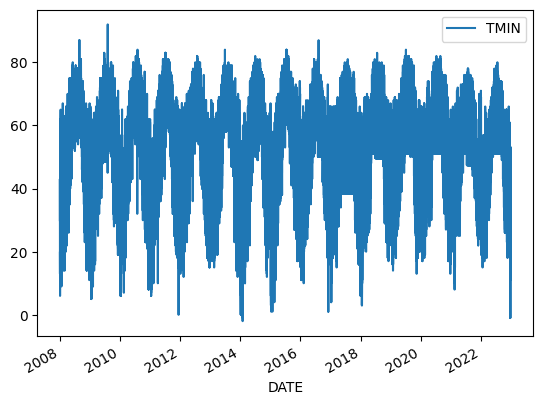

In [21]:
##plotting TMIN to understand the distribution

AL_TES_num[['TMIN']].plot()

In [22]:
# Extracting features (all columns except 'TMIN') and target variable
X = AL_TES_num.drop('TMIN', axis=1)
y = AL_TES_num['TMIN']

# Splitting the data into training and testing sets (80% train, 20% test)
train_size = int(len(y) * 0.8)
X_train, X_test = X.iloc[:train_size, :], X.iloc[train_size:, :]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Check the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (89498, 7) (89498,)
Testing set shape: (22375, 7) (22375,)


Forecast for 2023 (alpha=0.7, beta=0.3):
2023-01-01    57.371843
2023-01-02    55.866256
2023-01-03    56.487139
2023-01-04    56.771277
2023-01-05    56.281410
                ...    
2023-12-27    57.415205
2023-12-28    57.959564
2023-12-29    57.609846
2023-12-30    56.083247
2023-12-31    54.780115
Freq: D, Length: 365, dtype: float64


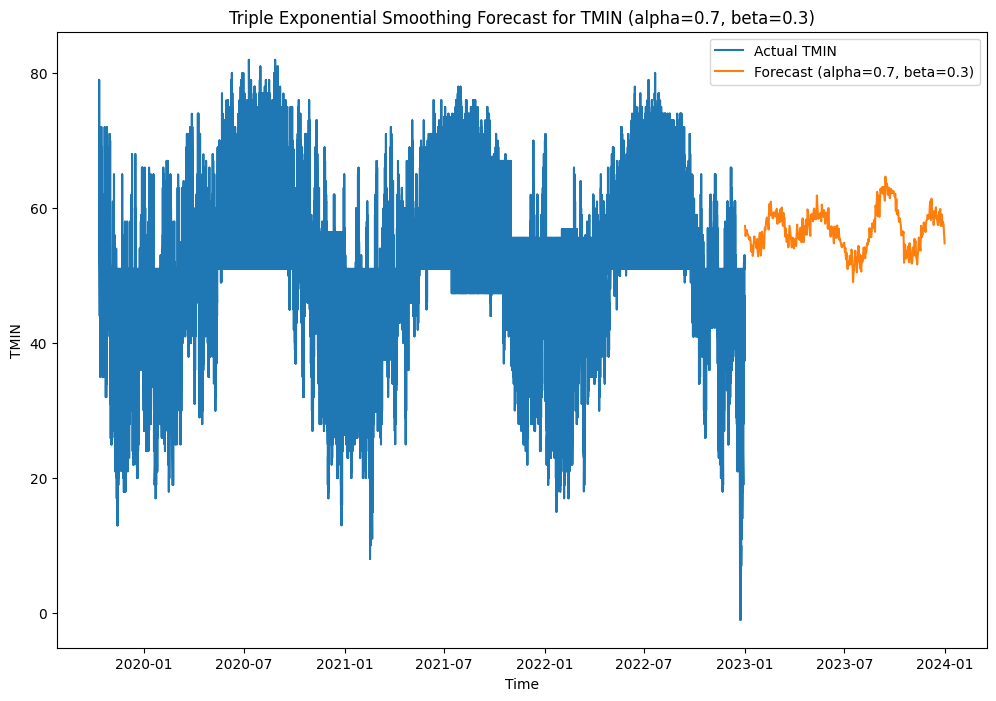

Forecast for 2023 (alpha=0.7, beta=0.2):
2023-01-01    57.371843
2023-01-02    55.866256
2023-01-03    56.487139
2023-01-04    56.771277
2023-01-05    56.281410
                ...    
2023-12-27    57.415205
2023-12-28    57.959564
2023-12-29    57.609846
2023-12-30    56.083247
2023-12-31    54.780115
Freq: D, Length: 365, dtype: float64


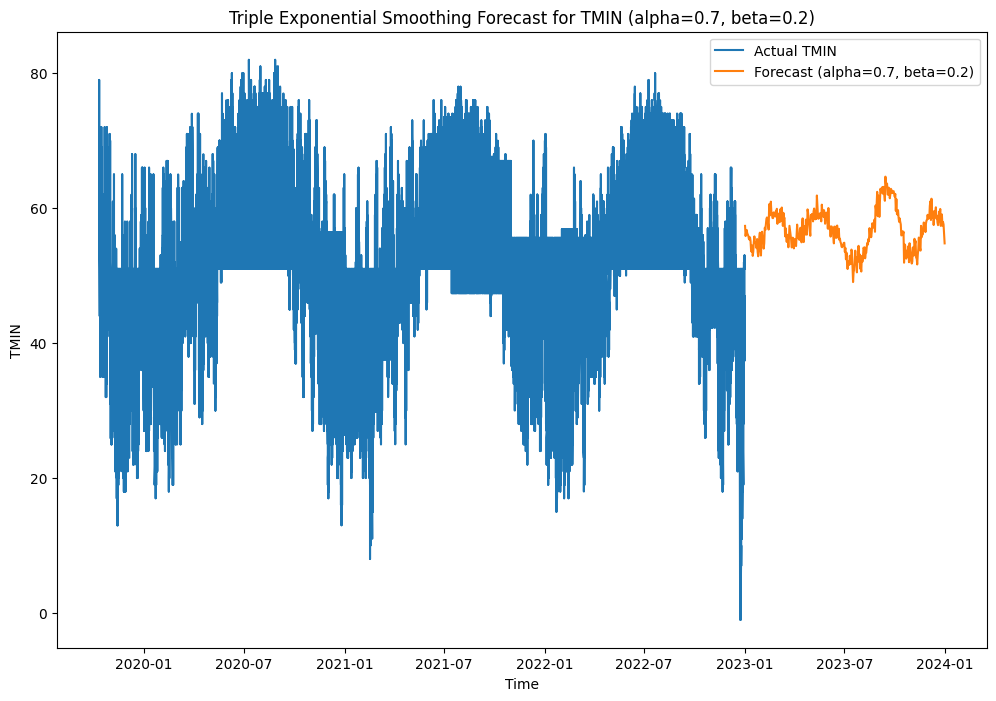

Forecast for 2023 (alpha=0.7, beta=0.1):
2023-01-01    57.371843
2023-01-02    55.866256
2023-01-03    56.487139
2023-01-04    56.771277
2023-01-05    56.281410
                ...    
2023-12-27    57.415205
2023-12-28    57.959564
2023-12-29    57.609846
2023-12-30    56.083247
2023-12-31    54.780115
Freq: D, Length: 365, dtype: float64


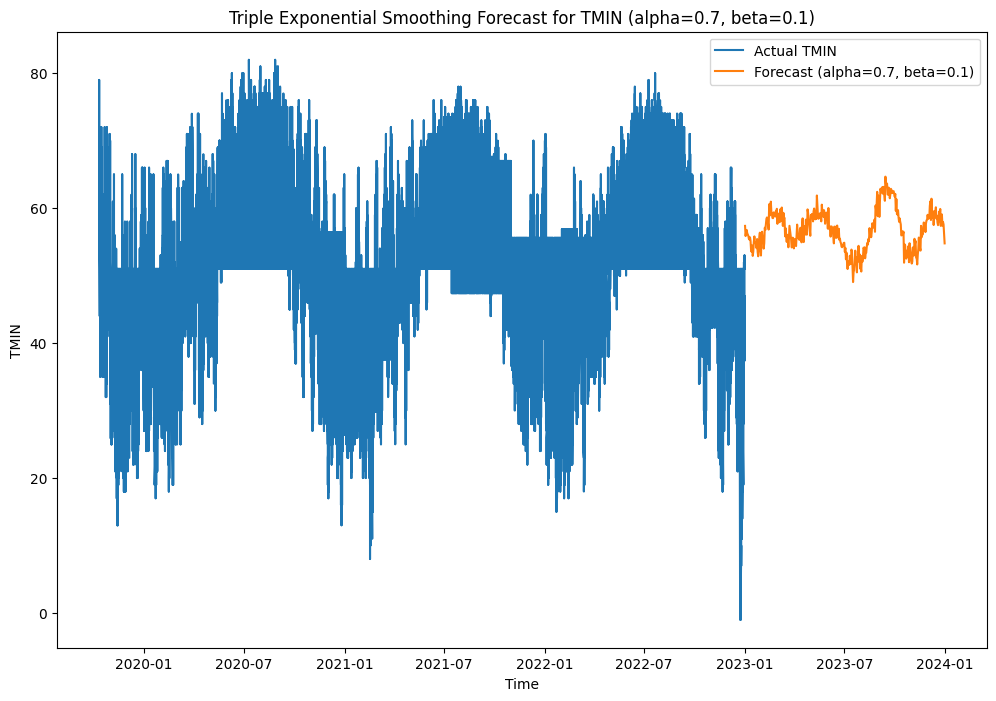

Forecast for 2023 (alpha=0.8, beta=0.3):
2023-01-01    55.949634
2023-01-02    54.446653
2023-01-03    54.687339
2023-01-04    55.194364
2023-01-05    54.883886
                ...    
2023-12-27    55.343257
2023-12-28    55.651410
2023-12-29    55.586388
2023-12-30    54.354808
2023-12-31    53.768126
Freq: D, Length: 365, dtype: float64


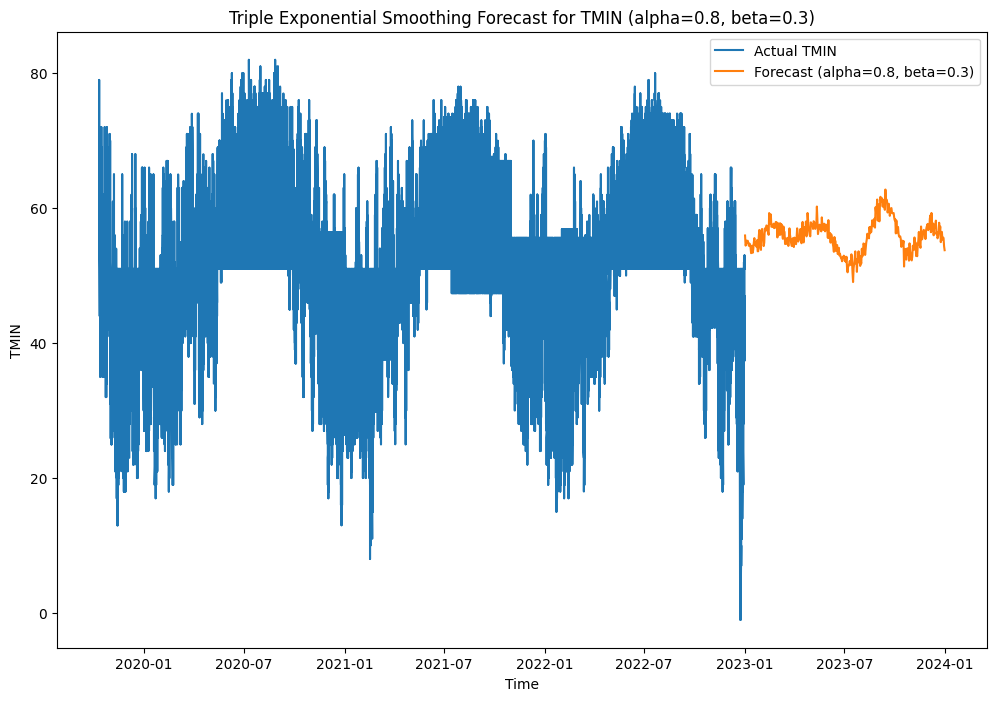

Forecast for 2023 (alpha=0.8, beta=0.2):
2023-01-01    55.949634
2023-01-02    54.446653
2023-01-03    54.687339
2023-01-04    55.194364
2023-01-05    54.883886
                ...    
2023-12-27    55.343257
2023-12-28    55.651410
2023-12-29    55.586388
2023-12-30    54.354808
2023-12-31    53.768126
Freq: D, Length: 365, dtype: float64


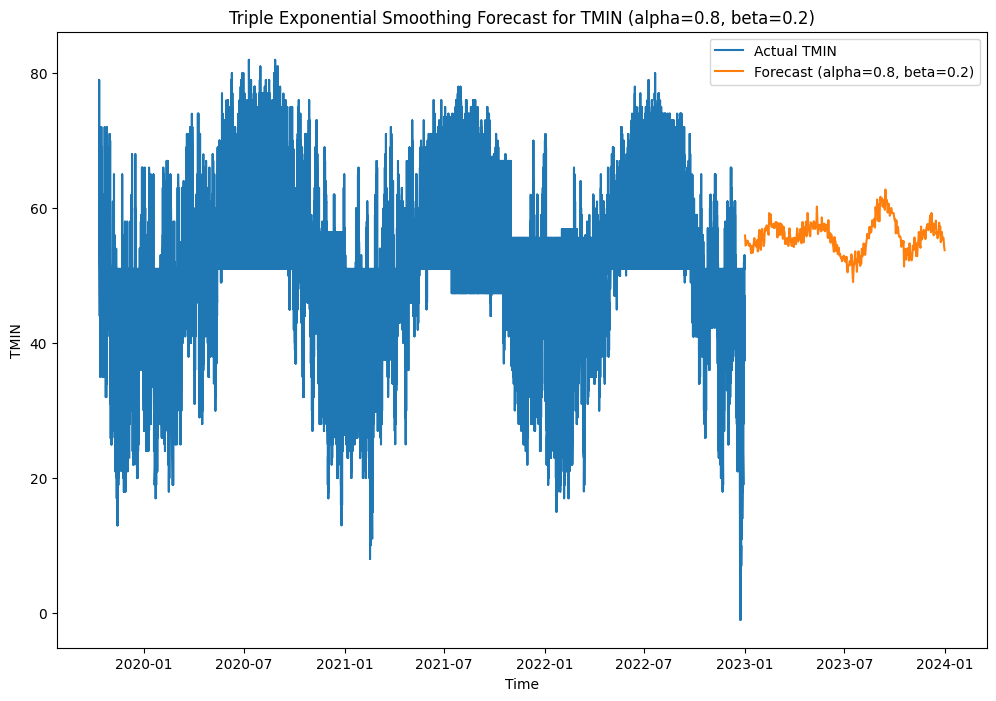

Forecast for 2023 (alpha=0.8, beta=0.1):
2023-01-01    55.949634
2023-01-02    54.446653
2023-01-03    54.687339
2023-01-04    55.194364
2023-01-05    54.883886
                ...    
2023-12-27    55.343257
2023-12-28    55.651410
2023-12-29    55.586388
2023-12-30    54.354808
2023-12-31    53.768126
Freq: D, Length: 365, dtype: float64


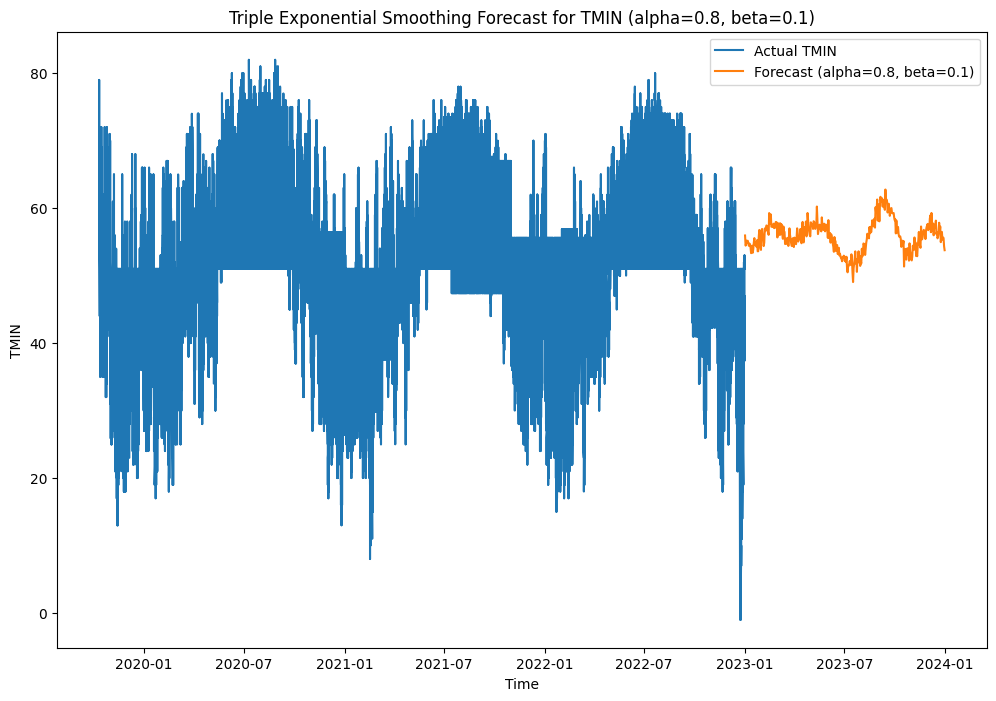

Forecast for 2023 (alpha=0.9, beta=0.3):
2023-01-01    54.599136
2023-01-02    52.877198
2023-01-03    53.128029
2023-01-04    53.635209
2023-01-05    53.461995
                ...    
2023-12-27    54.694619
2023-12-28    54.852989
2023-12-29    54.447457
2023-12-30    53.089244
2023-12-31    52.410554
Freq: D, Length: 365, dtype: float64


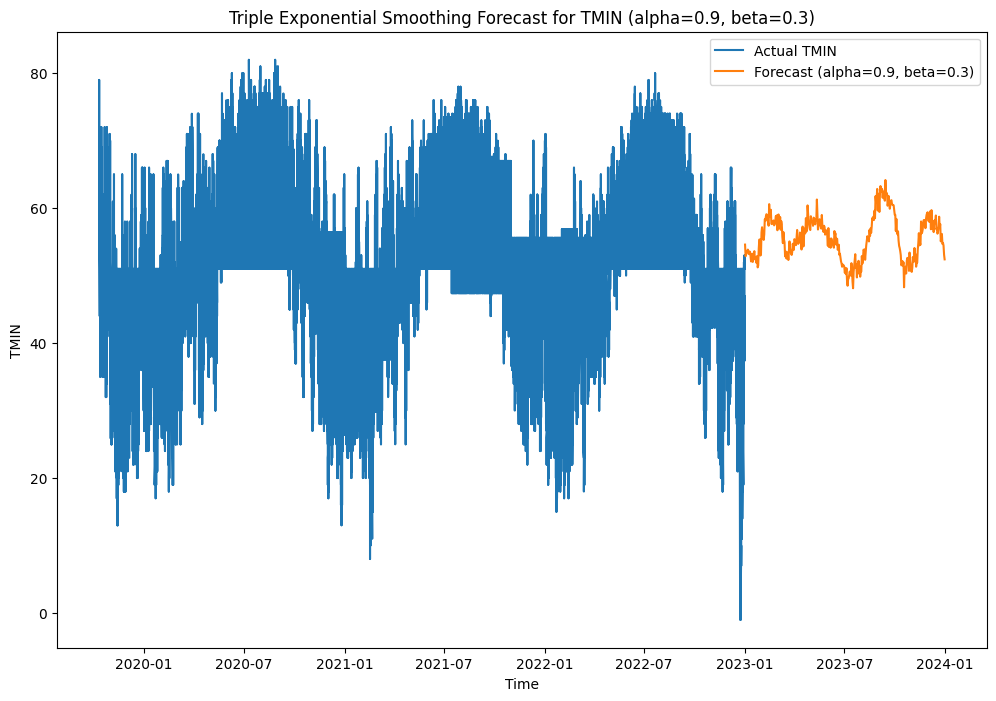

Forecast for 2023 (alpha=0.9, beta=0.2):
2023-01-01    54.599136
2023-01-02    52.877198
2023-01-03    53.128029
2023-01-04    53.635209
2023-01-05    53.461995
                ...    
2023-12-27    54.694619
2023-12-28    54.852989
2023-12-29    54.447457
2023-12-30    53.089244
2023-12-31    52.410554
Freq: D, Length: 365, dtype: float64


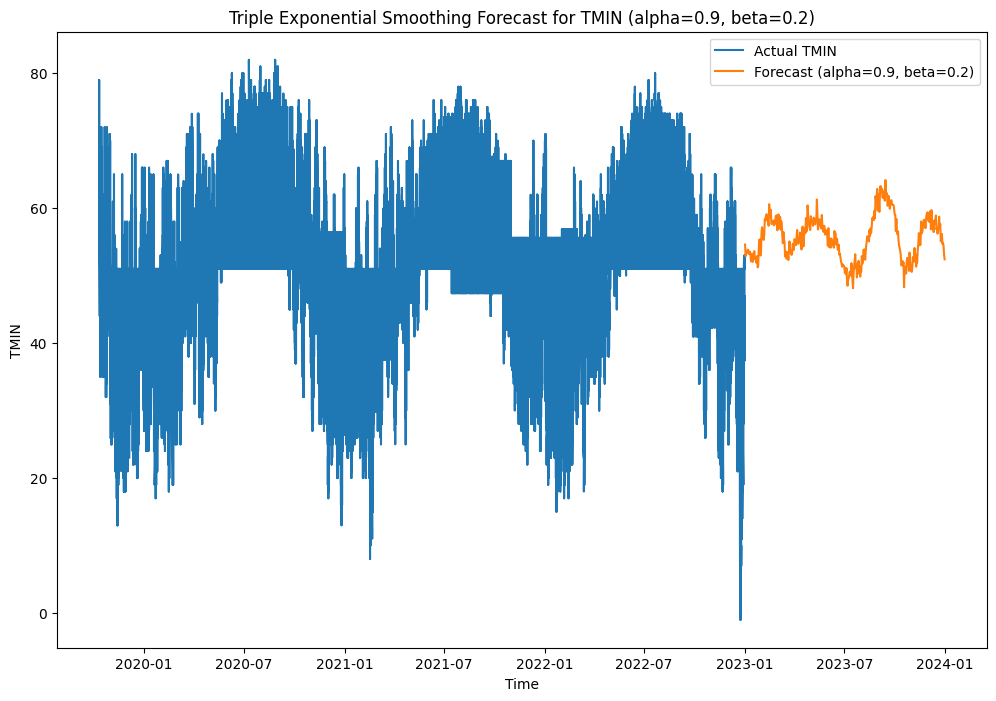

Forecast for 2023 (alpha=0.9, beta=0.1):
2023-01-01    54.599136
2023-01-02    52.877198
2023-01-03    53.128029
2023-01-04    53.635209
2023-01-05    53.461995
                ...    
2023-12-27    54.694619
2023-12-28    54.852989
2023-12-29    54.447457
2023-12-30    53.089244
2023-12-31    52.410554
Freq: D, Length: 365, dtype: float64


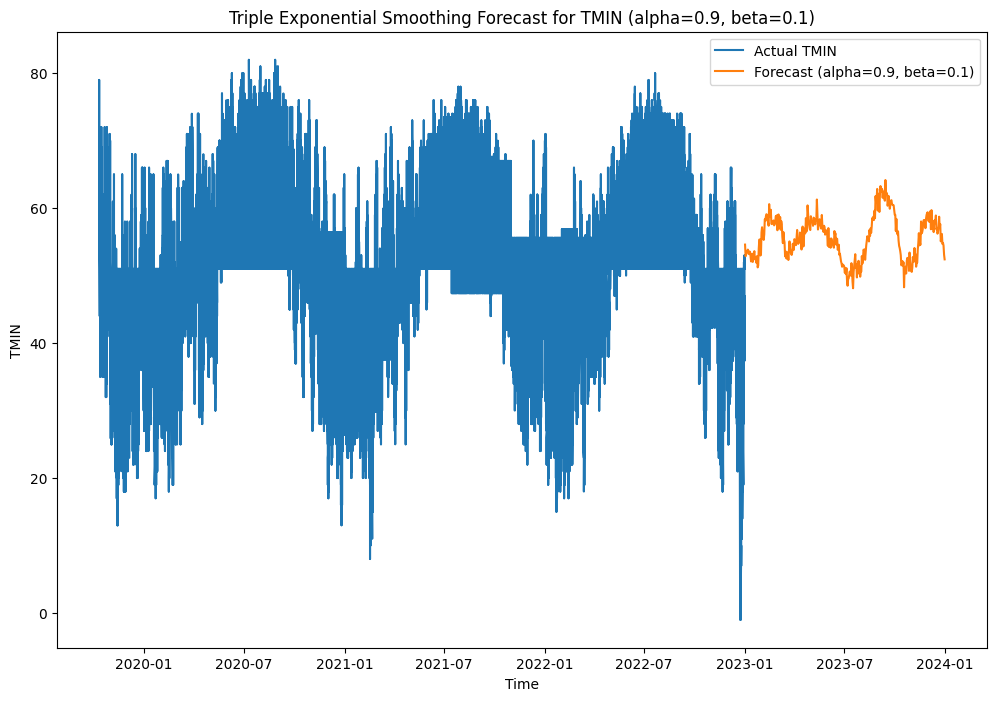

In [23]:
warnings.filterwarnings("ignore")

# Iterate over each combination of alpha and beta values
for alpha in alphas:
    for beta in betas:
        # Train the Triple Exponential Smoothing model on the training set
        model = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=365)
        results = model.fit(smoothing_level=alpha, smoothing_slope=beta)

        # Forecast for 2023
        forecast_steps_2023 = 365
        forecast_2023 = results.forecast(steps=forecast_steps_2023)

        # Set the forecast index to cover the period for 2023
        forecast_index_2023 = pd.date_range(start=y_test.index[-1] + pd.Timedelta(days=1), periods=forecast_steps_2023)
        forecast_2023.index = forecast_index_2023

        # # Print the forecasted values for 2023
        print(f'Forecast for 2023 (alpha={alpha}, beta={beta}):')
        print(forecast_2023)

# Plot the actual values, and forecast for 2023
        plt.figure(figsize=(12, 8))
        plt.plot(y_test.index, y_test, label='Actual TMIN')
        plt.plot(forecast_2023.index, forecast_2023.iloc[:len(y_test)], label=f'Forecast (alpha={alpha}, beta={beta})')  # Ensure the correct length
        # Set title, labels, and legend for the current combination of alpha and beta
        plt.title(f'Triple Exponential Smoothing Forecast for TMIN (alpha={alpha}, beta={beta})')
        plt.xlabel('Time')
        plt.ylabel('TMIN')
        plt.legend()
        plt.show()

In [24]:
# Perform a grid search
for alpha, beta in itertools.product(alphas, betas):
    model_tes = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=seasonal_period, initialization_method="estimated").fit(smoothing_level=alpha, smoothing_trend=beta)
    forecast_tes = model_tes.forecast(steps=len(y_test))  # Use forecast_tes within the loop

    # Evaluate and print metrics for each combination of alpha and beta
    mae = mean_absolute_error(y_test, forecast_tes)
    mse = mean_squared_error(y_test, forecast_tes)
    mape = np.mean(np.abs((y_test.values - forecast_tes.values) / y_test.values)) * 100
    
    print(f"Alpha: {alpha}, Beta: {beta}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%\n")

Alpha: 0.7, Beta: 0.3
Mean Absolute Error: 97295.81445467539
Mean Squared Error: 12621047805.431288
Mean Absolute Percentage Error (MAPE): 211921.31%

Alpha: 0.7, Beta: 0.2
Mean Absolute Error: 12076.666885725583
Mean Squared Error: 194523980.7085025
Mean Absolute Percentage Error (MAPE): 26293.56%

Alpha: 0.7, Beta: 0.1
Mean Absolute Error: 5985.203685248305
Mean Squared Error: 47792198.623350464
Mean Absolute Percentage Error (MAPE): 13024.90%

Alpha: 0.8, Beta: 0.3
Mean Absolute Error: 27402.478775408654
Mean Squared Error: 1001293330.8444214
Mean Absolute Percentage Error (MAPE): 59676.85%

Alpha: 0.8, Beta: 0.2
Mean Absolute Error: 16723.33491761619
Mean Squared Error: 372949606.9717285
Mean Absolute Percentage Error (MAPE): 36415.14%

Alpha: 0.8, Beta: 0.1
Mean Absolute Error: 7204.558413244344
Mean Squared Error: 69236501.13747089
Mean Absolute Percentage Error (MAPE): 15680.96%

Alpha: 0.9, Beta: 0.3
Mean Absolute Error: 18012.59191459761
Mean Squared Error: 432364272.82789165


<Axes: xlabel='DATE'>

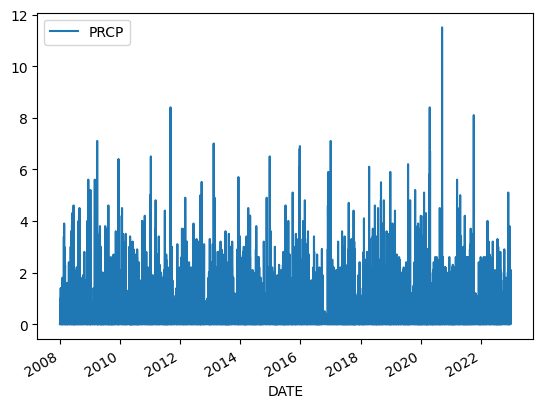

In [25]:
##plotting PRCP to understand the distribution

AL_TES_num[['PRCP']].plot()

In [26]:
# Extracting features (all columns except 'PRCP') and target variable
X = AL_TES_num.drop('PRCP', axis=1)
y = AL_TES_num['PRCP']

# Splitting the data into training and testing sets (80% train, 20% test)
train_size = int(len(y) * 0.8)
X_train, X_test = X.iloc[:train_size, :], X.iloc[train_size:, :]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Check the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (89498, 7) (89498,)
Testing set shape: (22375, 7) (22375,)


Forecast for 2023 (alpha=0.7, beta=0.3):
2023-01-01    0.013404
2023-01-02   -0.019884
2023-01-03    0.004301
2023-01-04    0.013578
2023-01-05   -0.006124
                ...   
2023-12-27   -0.020004
2023-12-28   -0.020499
2023-12-29   -0.027027
2023-12-30   -0.012642
2023-12-31    0.006945
Freq: D, Length: 365, dtype: float64


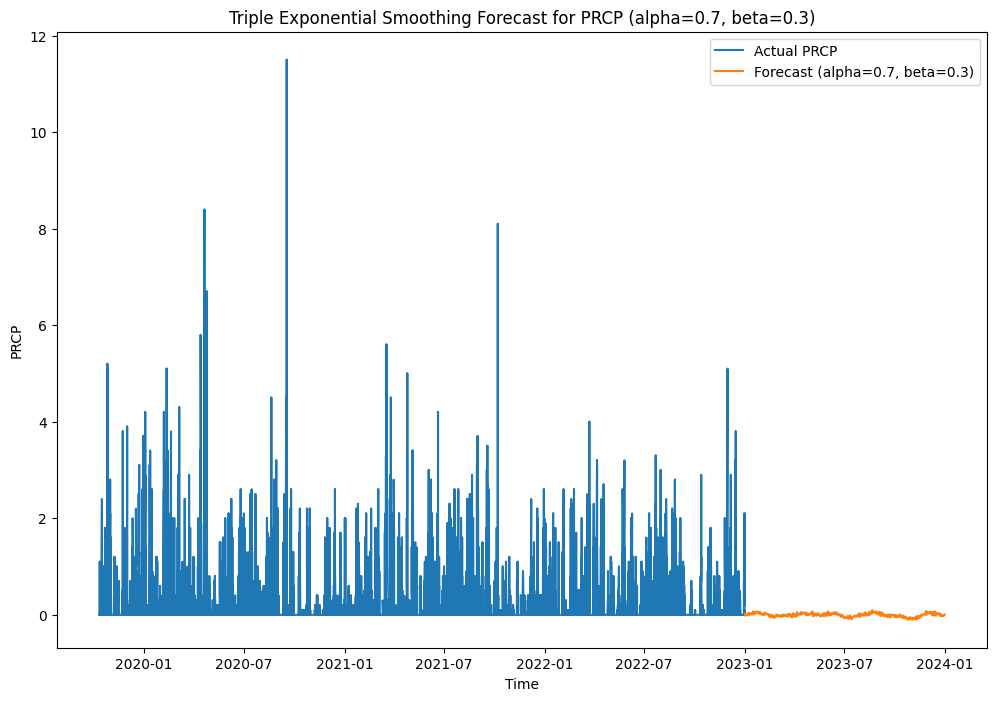

Forecast for 2023 (alpha=0.7, beta=0.2):
2023-01-01    0.013404
2023-01-02   -0.019884
2023-01-03    0.004301
2023-01-04    0.013578
2023-01-05   -0.006124
                ...   
2023-12-27   -0.020004
2023-12-28   -0.020499
2023-12-29   -0.027027
2023-12-30   -0.012642
2023-12-31    0.006945
Freq: D, Length: 365, dtype: float64


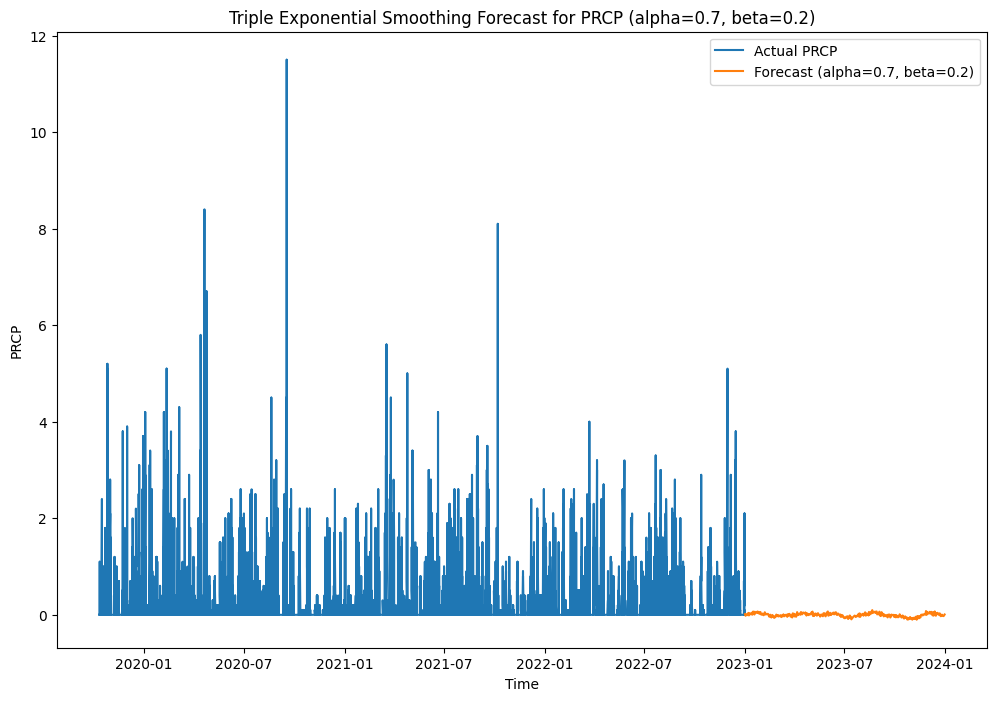

Forecast for 2023 (alpha=0.7, beta=0.1):
2023-01-01    0.013404
2023-01-02   -0.019884
2023-01-03    0.004301
2023-01-04    0.013578
2023-01-05   -0.006124
                ...   
2023-12-27   -0.020004
2023-12-28   -0.020499
2023-12-29   -0.027027
2023-12-30   -0.012642
2023-12-31    0.006945
Freq: D, Length: 365, dtype: float64


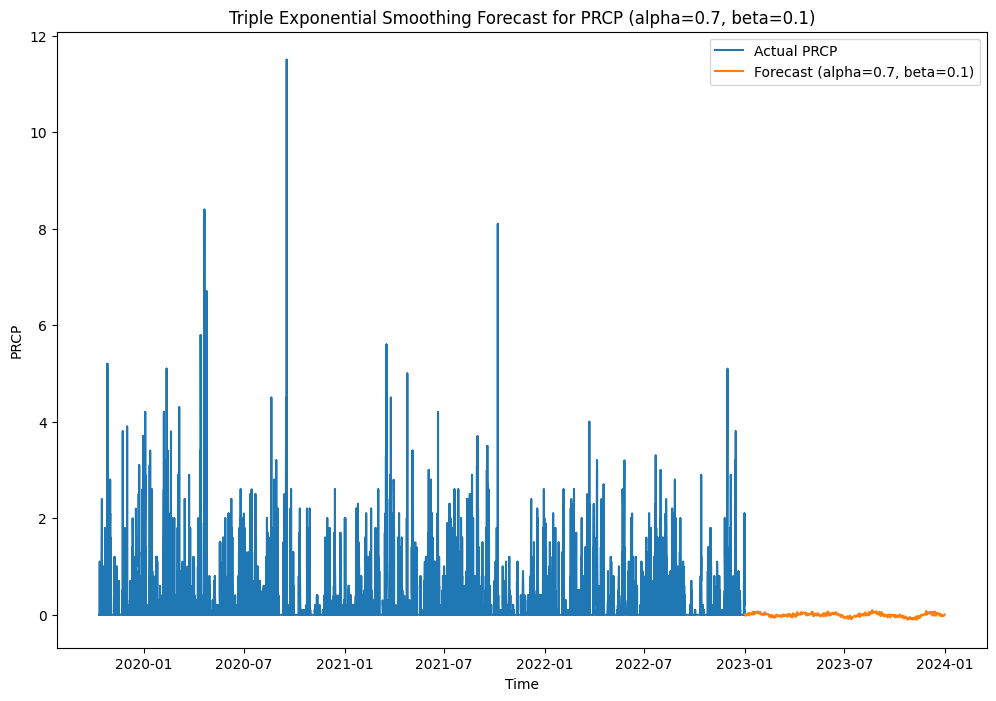

Forecast for 2023 (alpha=0.8, beta=0.3):
2023-01-01    0.012013
2023-01-02   -0.016053
2023-01-03    0.012020
2023-01-04    0.020569
2023-01-05    0.004469
                ...   
2023-12-27   -0.032332
2023-12-28   -0.029803
2023-12-29   -0.032110
2023-12-30   -0.015537
2023-12-31    0.004682
Freq: D, Length: 365, dtype: float64


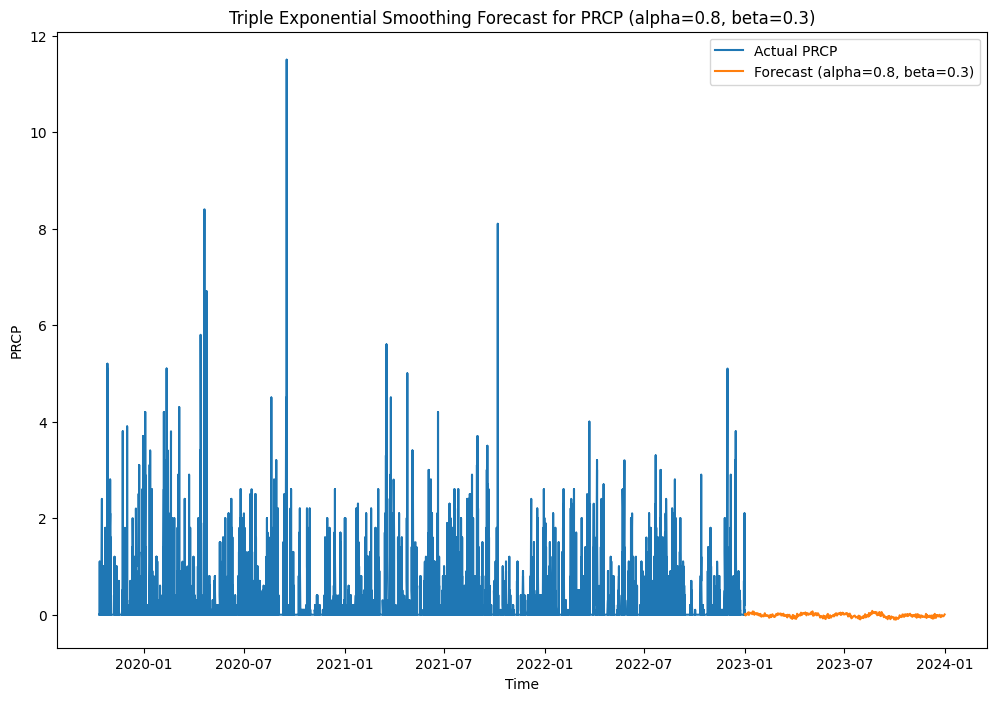

Forecast for 2023 (alpha=0.8, beta=0.2):
2023-01-01    0.012013
2023-01-02   -0.016053
2023-01-03    0.012020
2023-01-04    0.020569
2023-01-05    0.004469
                ...   
2023-12-27   -0.032332
2023-12-28   -0.029803
2023-12-29   -0.032110
2023-12-30   -0.015537
2023-12-31    0.004682
Freq: D, Length: 365, dtype: float64


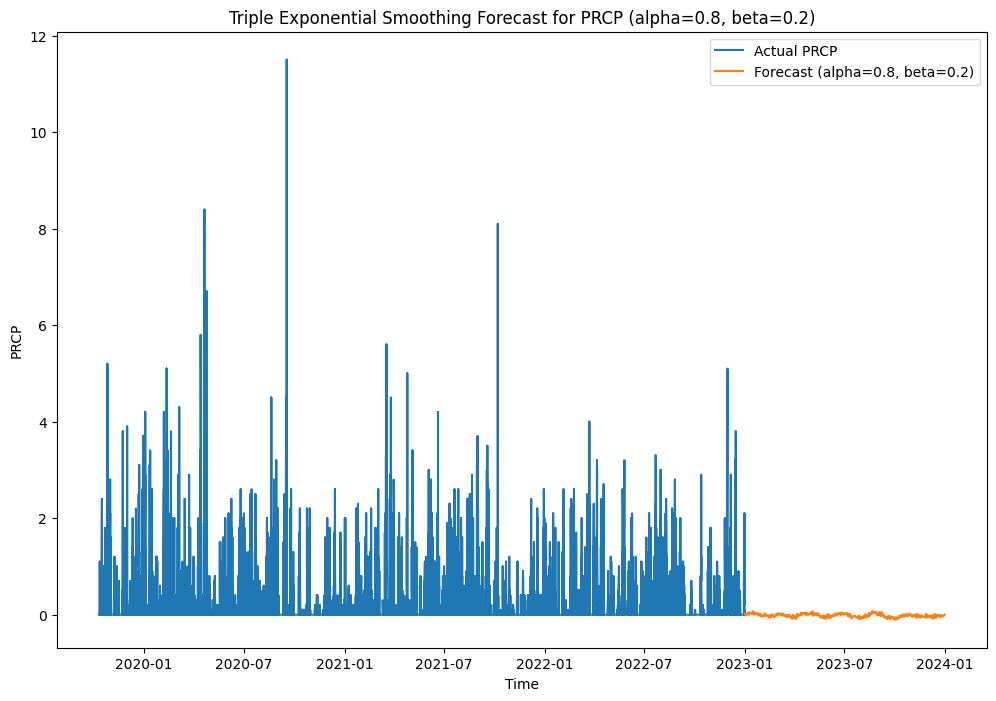

Forecast for 2023 (alpha=0.8, beta=0.1):
2023-01-01    0.012013
2023-01-02   -0.016053
2023-01-03    0.012020
2023-01-04    0.020569
2023-01-05    0.004469
                ...   
2023-12-27   -0.032332
2023-12-28   -0.029803
2023-12-29   -0.032110
2023-12-30   -0.015537
2023-12-31    0.004682
Freq: D, Length: 365, dtype: float64


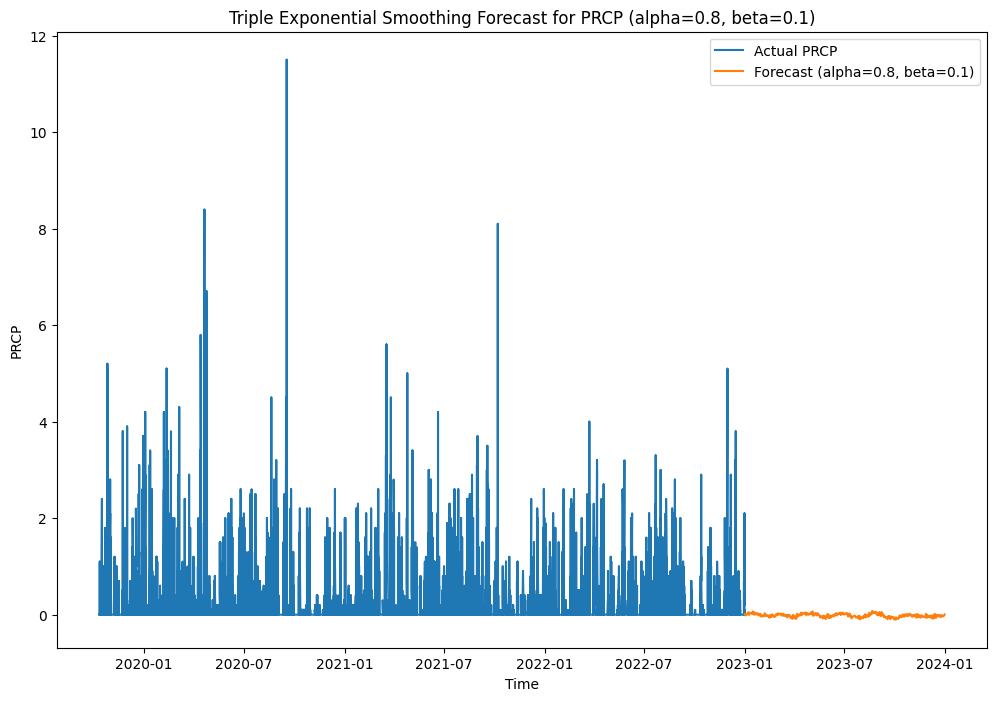

Forecast for 2023 (alpha=0.9, beta=0.3):
2023-01-01   -0.001338
2023-01-02   -0.032022
2023-01-03   -0.009952
2023-01-04   -0.011744
2023-01-05   -0.034303
                ...   
2023-12-27   -0.002602
2023-12-28   -0.006169
2023-12-29   -0.016910
2023-12-30   -0.010554
2023-12-31    0.001230
Freq: D, Length: 365, dtype: float64


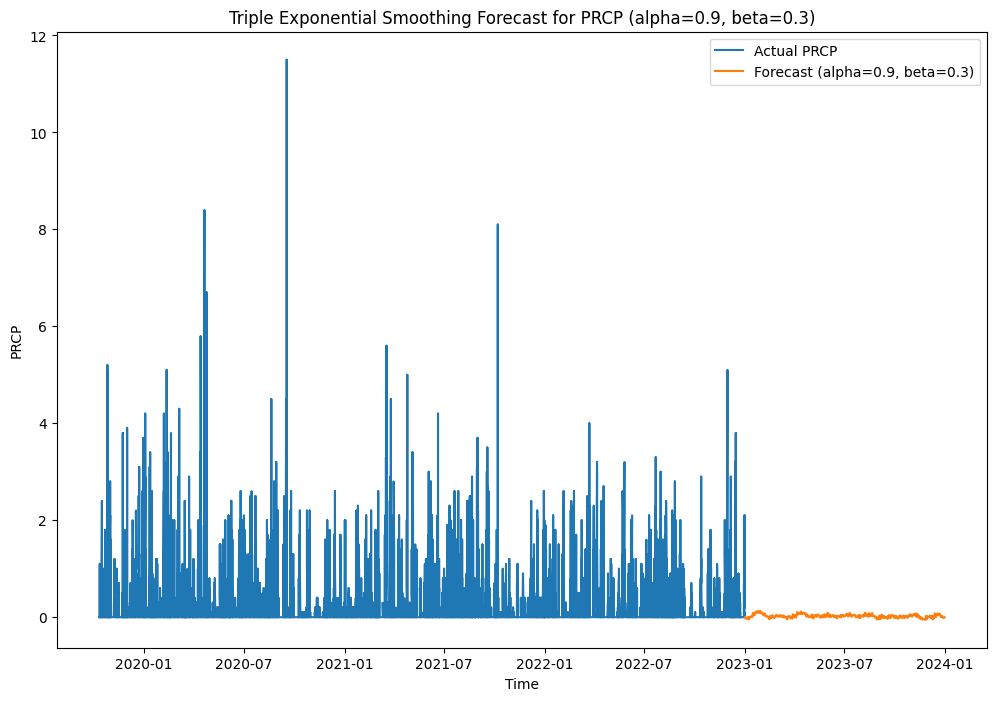

Forecast for 2023 (alpha=0.9, beta=0.2):
2023-01-01   -0.001338
2023-01-02   -0.032022
2023-01-03   -0.009952
2023-01-04   -0.011744
2023-01-05   -0.034303
                ...   
2023-12-27   -0.002602
2023-12-28   -0.006169
2023-12-29   -0.016910
2023-12-30   -0.010554
2023-12-31    0.001230
Freq: D, Length: 365, dtype: float64


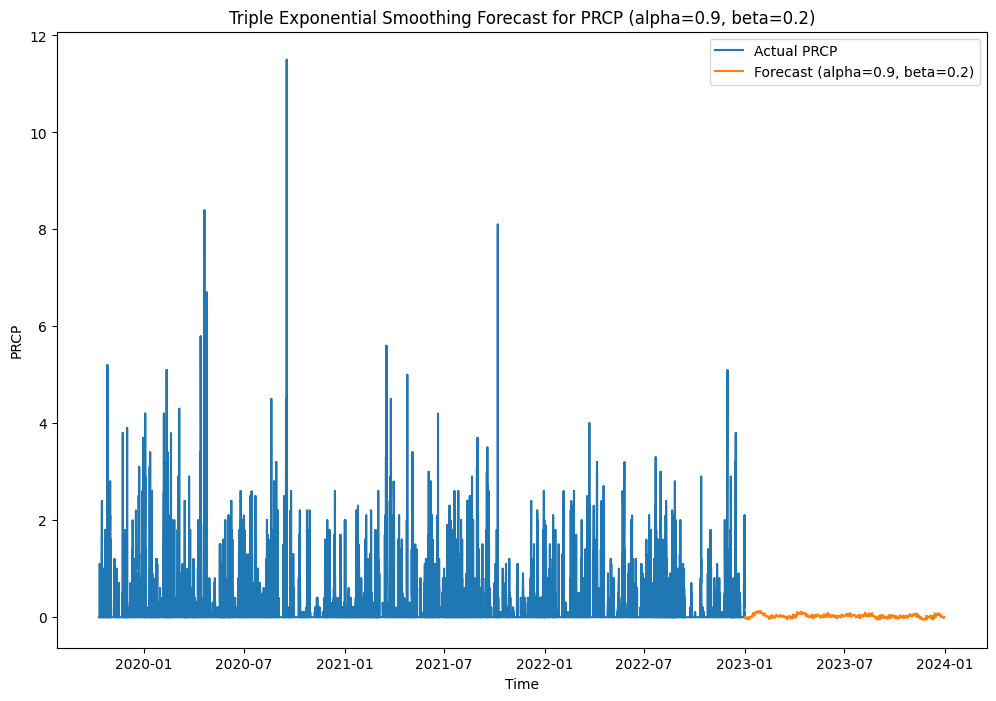

Forecast for 2023 (alpha=0.9, beta=0.1):
2023-01-01   -0.001338
2023-01-02   -0.032022
2023-01-03   -0.009952
2023-01-04   -0.011744
2023-01-05   -0.034303
                ...   
2023-12-27   -0.002602
2023-12-28   -0.006169
2023-12-29   -0.016910
2023-12-30   -0.010554
2023-12-31    0.001230
Freq: D, Length: 365, dtype: float64


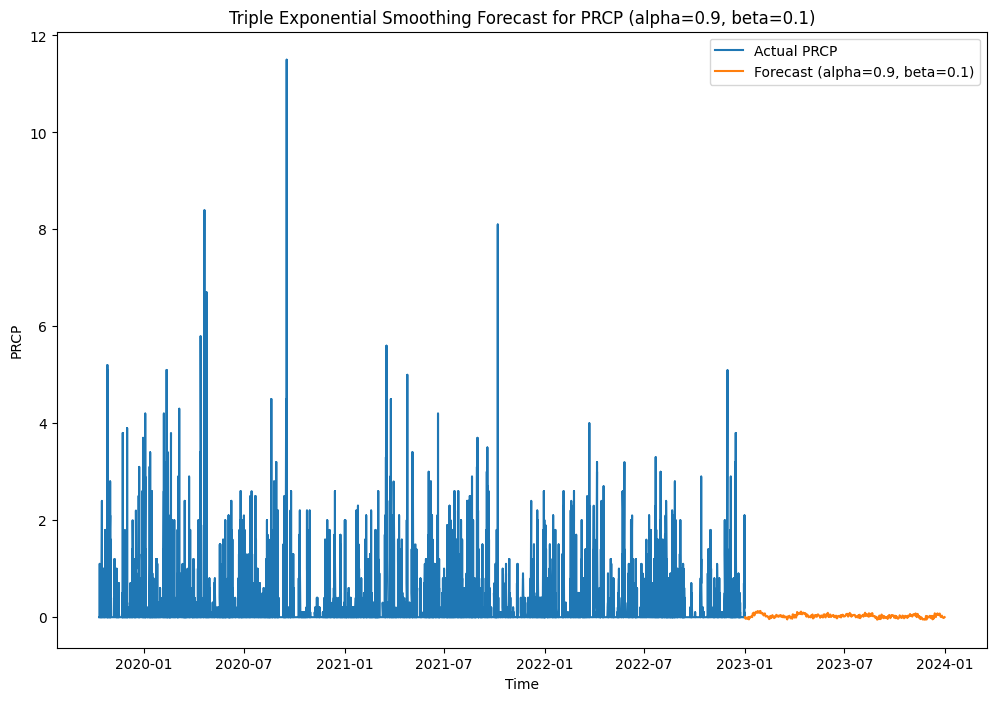

In [27]:
warnings.filterwarnings("ignore")

# Iterate over each combination of alpha and beta values
for alpha in alphas:
    for beta in betas:
        # Train the Triple Exponential Smoothing model on the training set
        model = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=365)
        results = model.fit(smoothing_level=alpha, smoothing_slope=beta)

        # Forecast for 2023
        forecast_steps_2023 = 365
        forecast_2023 = results.forecast(steps=forecast_steps_2023)

        # Set the forecast index to cover the period for 2023
        forecast_index_2023 = pd.date_range(start=y_test.index[-1] + pd.Timedelta(days=1), periods=forecast_steps_2023)
        forecast_2023.index = forecast_index_2023

        # # Print the forecasted values for 2023
        print(f'Forecast for 2023 (alpha={alpha}, beta={beta}):')
        print(forecast_2023)

# Plot the actual values, and forecast for 2023
        plt.figure(figsize=(12, 8))
        plt.plot(y_test.index, y_test, label='Actual PRCP')
        plt.plot(forecast_2023.index, forecast_2023.iloc[:len(y_test)], label=f'Forecast (alpha={alpha}, beta={beta})')  # Ensure the correct length
        # Set title, labels, and legend for the current combination of alpha and beta
        plt.title(f'Triple Exponential Smoothing Forecast for PRCP (alpha={alpha}, beta={beta})')
        plt.xlabel('Time')
        plt.ylabel('PRCP')
        plt.legend()
        plt.show()

In [28]:
# Perform a grid search
for alpha, beta in itertools.product(alphas, betas):
    model_tes = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=seasonal_period, initialization_method="estimated").fit(smoothing_level=alpha, smoothing_trend=beta)
    forecast_tes = model_tes.forecast(steps=len(y_test))  # Use forecast_tes within the loop

    # Evaluate and print metrics for each combination of alpha and beta
    mae = mean_absolute_error(y_test, forecast_tes)
    mse = mean_squared_error(y_test, forecast_tes)
    mape = np.mean(np.abs((y_test.values - forecast_tes.values) / y_test.values)) * 100
    
    print(f"Alpha: {alpha}, Beta: {beta}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%\n")

Alpha: 0.7, Beta: 0.3
Mean Absolute Error: 4.071557394366557
Mean Squared Error: 22.340556488089213
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.7, Beta: 0.2
Mean Absolute Error: 4.790334524597708
Mean Squared Error: 30.891422119327665
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.7, Beta: 0.1
Mean Absolute Error: 1.9079227569987696
Mean Squared Error: 4.953080549478831
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.8, Beta: 0.3
Mean Absolute Error: 0.19045280939100456
Mean Squared Error: 0.2042611292749884
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.8, Beta: 0.2
Mean Absolute Error: 2.3940154273936276
Mean Squared Error: 7.77002016110773
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.8, Beta: 0.1
Mean Absolute Error: 1.0046999617867893
Mean Squared Error: 1.400927979633771
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.9, Beta: 0.3
Mean Absolute Error: 4.601511570723598
Mean Squared Error: 27.984574198771195
Mean Absolute Percentage Erro

<Axes: xlabel='DATE'>

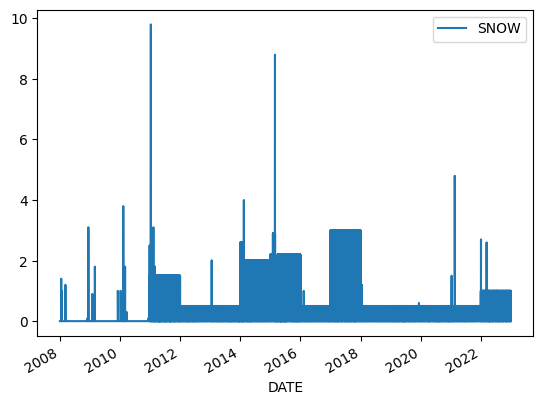

In [29]:
##plotting SNOW to understand the distribution

AL_TES_num[['SNOW']].plot()

In [30]:
# Extracting features (all columns except 'SNOW') and target variable
X = AL_TES_num.drop('SNOW', axis=1)
y = AL_TES_num['SNOW']

# Splitting the data into training and testing sets (80% train, 20% test)
train_size = int(len(y) * 0.8)
X_train, X_test = X.iloc[:train_size, :], X.iloc[train_size:, :]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Check the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (89498, 7) (89498,)
Testing set shape: (22375, 7) (22375,)


Forecast for 2023 (alpha=0.7, beta=0.3):
2023-01-01    0.070130
2023-01-02    0.028539
2023-01-03    0.067829
2023-01-04    0.002221
2023-01-05    0.054512
                ...   
2023-12-27    0.005208
2023-12-28    0.054054
2023-12-29    0.022894
2023-12-30    0.033228
2023-12-31   -0.000188
Freq: D, Length: 365, dtype: float64


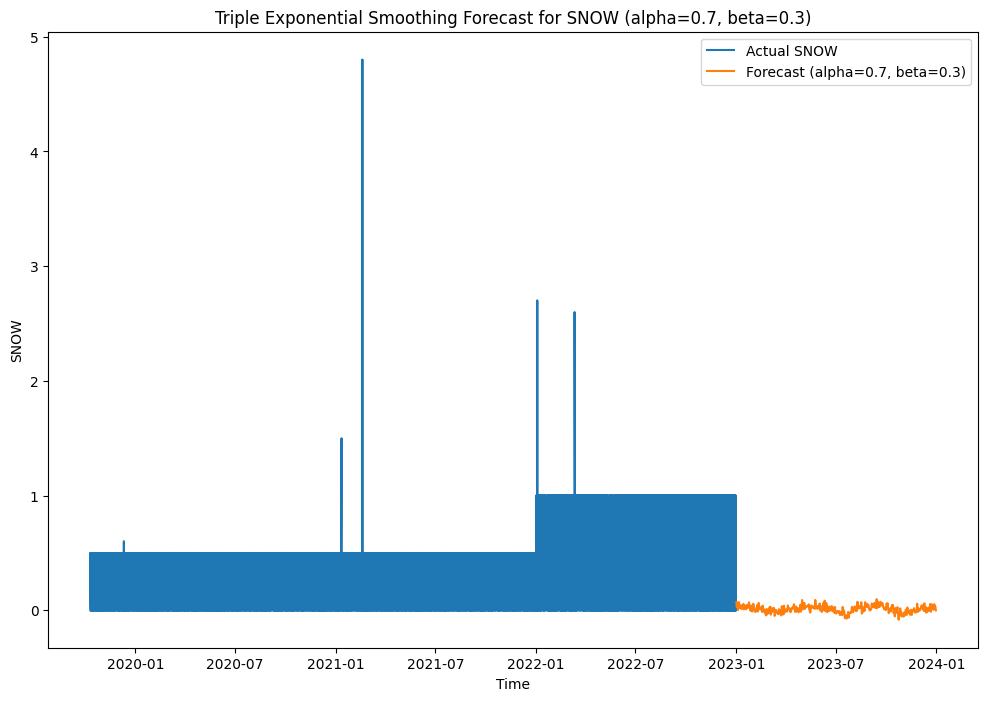

Forecast for 2023 (alpha=0.7, beta=0.2):
2023-01-01    0.070130
2023-01-02    0.028539
2023-01-03    0.067829
2023-01-04    0.002221
2023-01-05    0.054512
                ...   
2023-12-27    0.005208
2023-12-28    0.054054
2023-12-29    0.022894
2023-12-30    0.033228
2023-12-31   -0.000188
Freq: D, Length: 365, dtype: float64


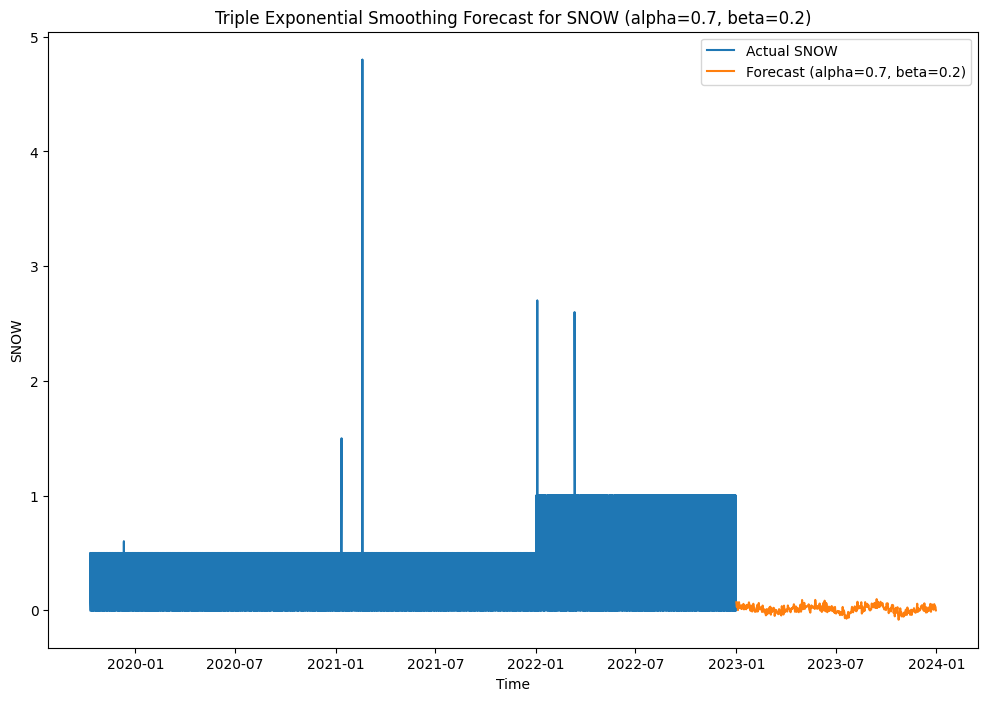

Forecast for 2023 (alpha=0.7, beta=0.1):
2023-01-01    0.070130
2023-01-02    0.028539
2023-01-03    0.067829
2023-01-04    0.002221
2023-01-05    0.054512
                ...   
2023-12-27    0.005208
2023-12-28    0.054054
2023-12-29    0.022894
2023-12-30    0.033228
2023-12-31   -0.000188
Freq: D, Length: 365, dtype: float64


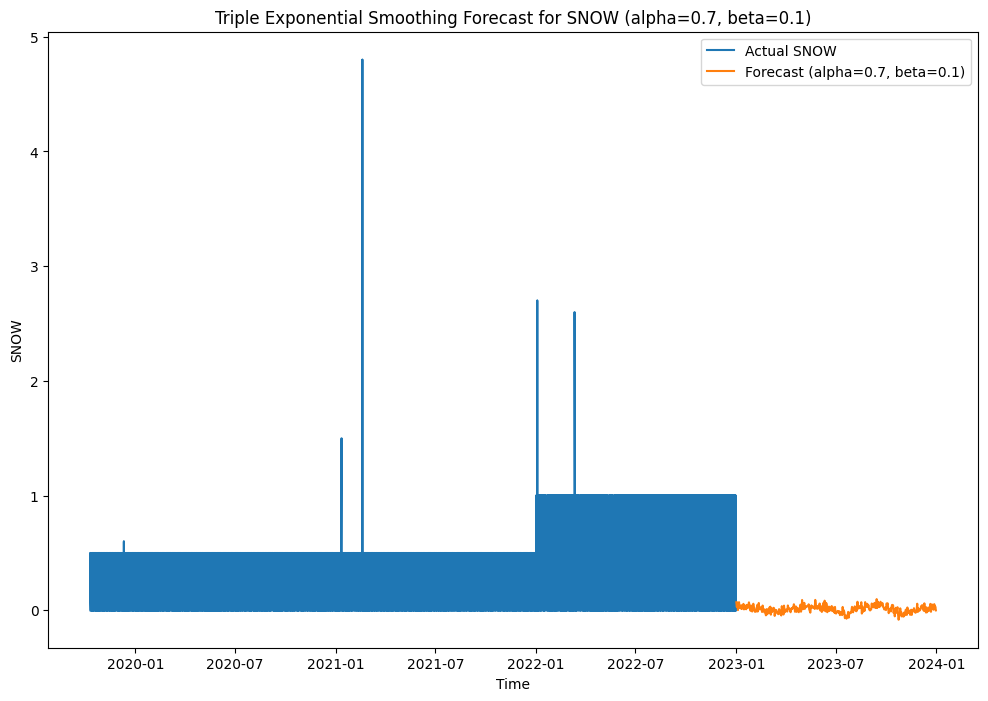

Forecast for 2023 (alpha=0.8, beta=0.3):
2023-01-01    0.065146
2023-01-02    0.030797
2023-01-03    0.069846
2023-01-04    0.004758
2023-01-05    0.056030
                ...   
2023-12-27   -0.014145
2023-12-28    0.040592
2023-12-29    0.016270
2023-12-30    0.028326
2023-12-31   -0.002658
Freq: D, Length: 365, dtype: float64


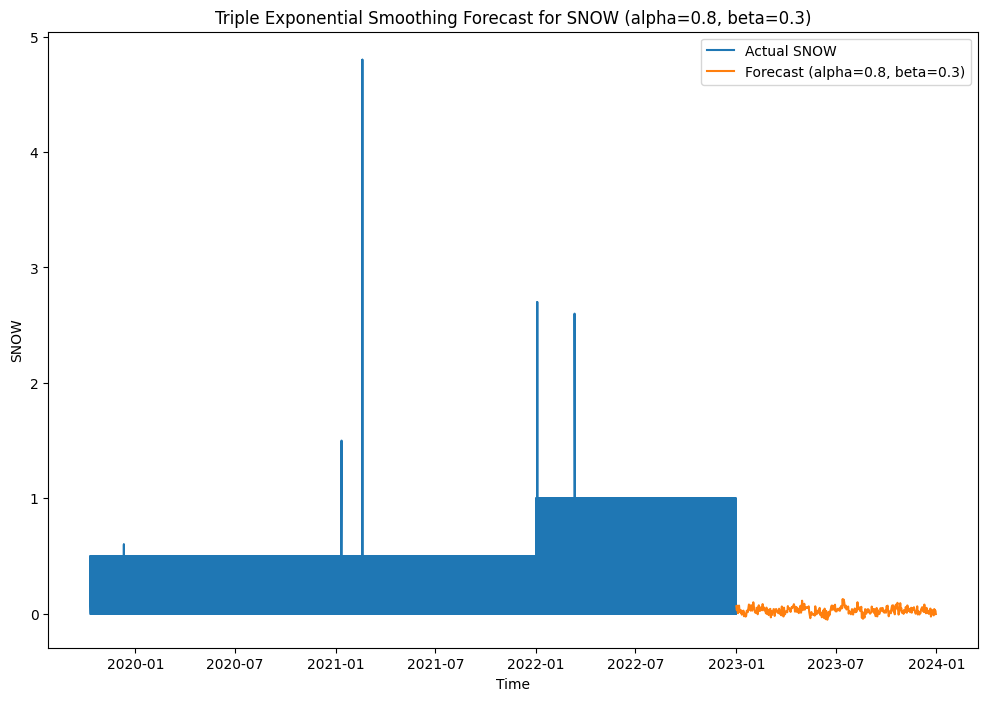

Forecast for 2023 (alpha=0.8, beta=0.2):
2023-01-01    0.065146
2023-01-02    0.030797
2023-01-03    0.069846
2023-01-04    0.004758
2023-01-05    0.056030
                ...   
2023-12-27   -0.014145
2023-12-28    0.040592
2023-12-29    0.016270
2023-12-30    0.028326
2023-12-31   -0.002658
Freq: D, Length: 365, dtype: float64


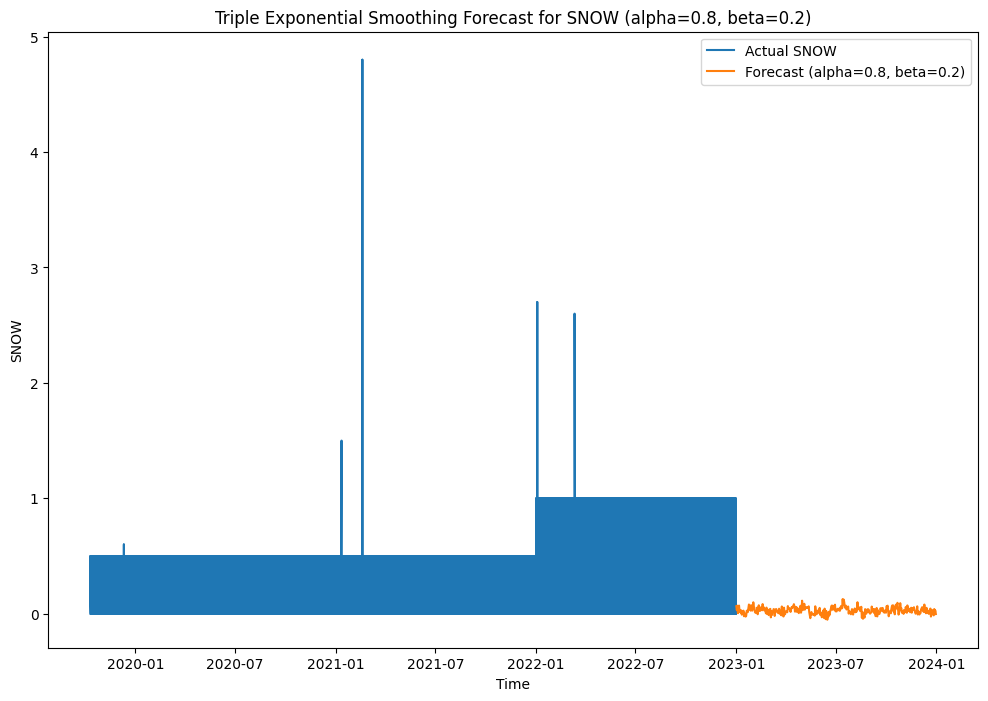

Forecast for 2023 (alpha=0.8, beta=0.1):
2023-01-01    0.065146
2023-01-02    0.030797
2023-01-03    0.069846
2023-01-04    0.004758
2023-01-05    0.056030
                ...   
2023-12-27   -0.014145
2023-12-28    0.040592
2023-12-29    0.016270
2023-12-30    0.028326
2023-12-31   -0.002658
Freq: D, Length: 365, dtype: float64


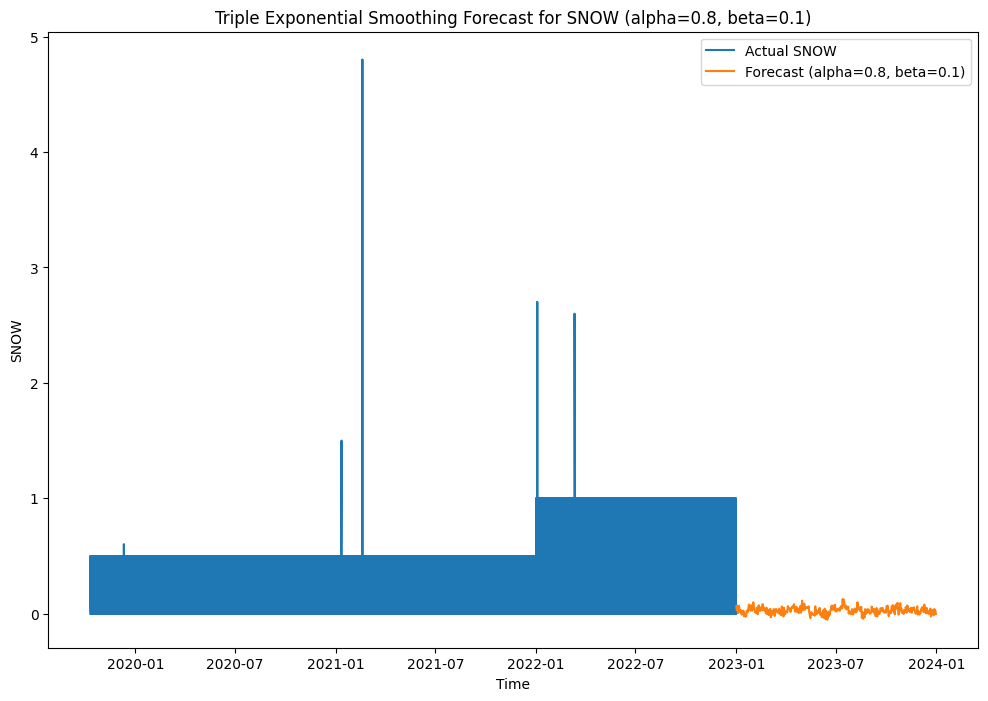

Forecast for 2023 (alpha=0.9, beta=0.3):
2023-01-01    0.063303
2023-01-02    0.020156
2023-01-03    0.052956
2023-01-04   -0.016431
2023-01-05    0.033116
                ...   
2023-12-27   -0.030131
2023-12-28    0.030247
2023-12-29    0.006642
2023-12-30    0.023228
2023-12-31   -0.001930
Freq: D, Length: 365, dtype: float64


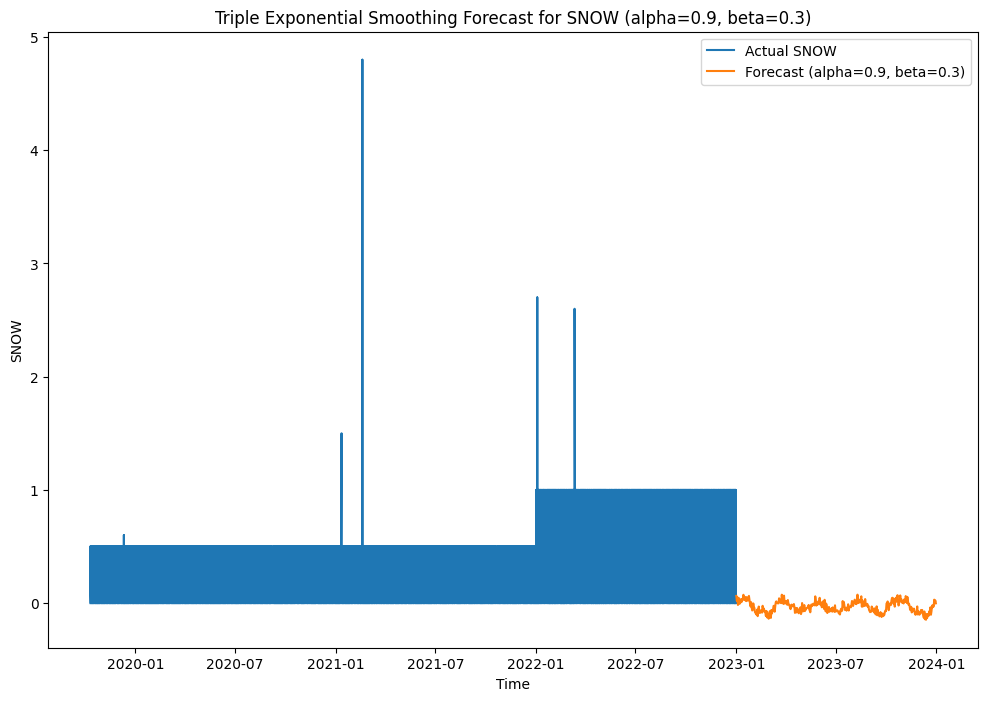

Forecast for 2023 (alpha=0.9, beta=0.2):
2023-01-01    0.063303
2023-01-02    0.020156
2023-01-03    0.052956
2023-01-04   -0.016431
2023-01-05    0.033116
                ...   
2023-12-27   -0.030131
2023-12-28    0.030247
2023-12-29    0.006642
2023-12-30    0.023228
2023-12-31   -0.001930
Freq: D, Length: 365, dtype: float64


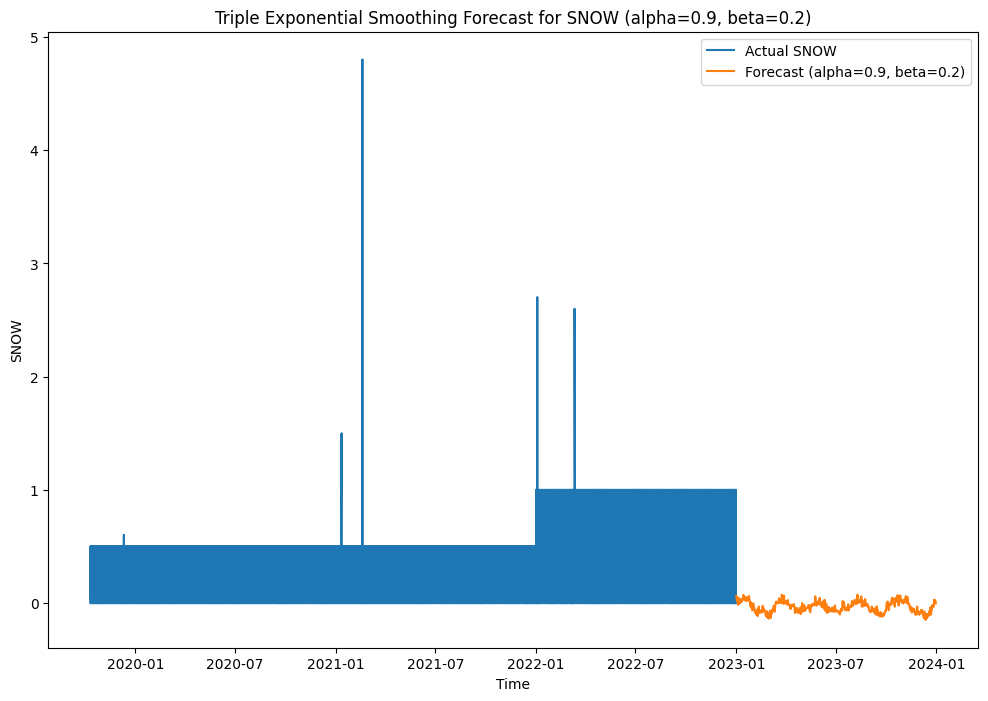

Forecast for 2023 (alpha=0.9, beta=0.1):
2023-01-01    0.063303
2023-01-02    0.020156
2023-01-03    0.052956
2023-01-04   -0.016431
2023-01-05    0.033116
                ...   
2023-12-27   -0.030131
2023-12-28    0.030247
2023-12-29    0.006642
2023-12-30    0.023228
2023-12-31   -0.001930
Freq: D, Length: 365, dtype: float64


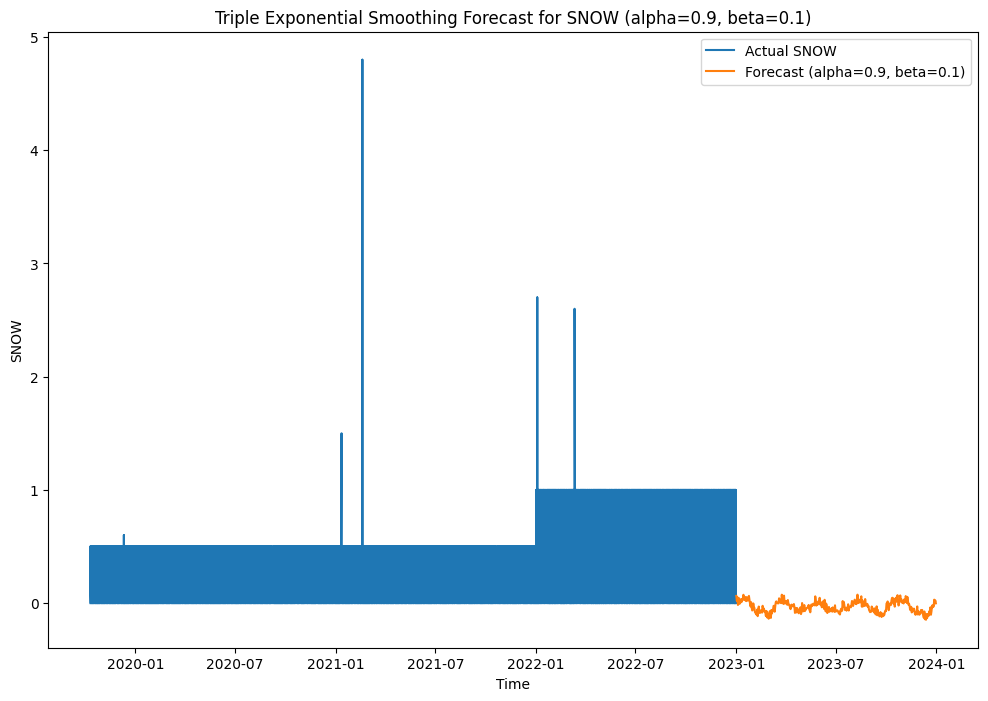

In [31]:
warnings.filterwarnings("ignore")

# Iterate over each combination of alpha and beta values
for alpha in alphas:
    for beta in betas:
        # Train the Triple Exponential Smoothing model on the training set
        model = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=365)
        results = model.fit(smoothing_level=alpha, smoothing_slope=beta)

        # Forecast for 2023
        forecast_steps_2023 = 365
        forecast_2023 = results.forecast(steps=forecast_steps_2023)

        # Set the forecast index to cover the period for 2023
        forecast_index_2023 = pd.date_range(start=y_test.index[-1] + pd.Timedelta(days=1), periods=forecast_steps_2023)
        forecast_2023.index = forecast_index_2023

        # # Print the forecasted values for 2023
        print(f'Forecast for 2023 (alpha={alpha}, beta={beta}):')
        print(forecast_2023)

# Plot the actual values, and forecast for 2023
        plt.figure(figsize=(12, 8))
        plt.plot(y_test.index, y_test, label='Actual SNOW')
        plt.plot(forecast_2023.index, forecast_2023.iloc[:len(y_test)], label=f'Forecast (alpha={alpha}, beta={beta})')  # Ensure the correct length
        # Set title, labels, and legend for the current combination of alpha and beta
        plt.title(f'Triple Exponential Smoothing Forecast for SNOW (alpha={alpha}, beta={beta})')
        plt.xlabel('Time')
        plt.ylabel('SNOW')
        plt.legend()
        plt.show()

In [32]:
# Perform a grid search
for alpha, beta in itertools.product(alphas, betas):
    model_tes = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=seasonal_period, initialization_method="estimated").fit(smoothing_level=alpha, smoothing_trend=beta)
    forecast_tes = model_tes.forecast(steps=len(y_test))  # Use forecast_tes within the loop

    # Evaluate and print metrics for each combination of alpha and beta
    mae = mean_absolute_error(y_test, forecast_tes)
    mse = mean_squared_error(y_test, forecast_tes)
    mape = np.mean(np.abs((y_test.values - forecast_tes.values) / y_test.values)) * 100
    
    print(f"Alpha: {alpha}, Beta: {beta}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%\n")

Alpha: 0.7, Beta: 0.3
Mean Absolute Error: 275.5958966019287
Mean Squared Error: 101266.1552757028
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.7, Beta: 0.2
Mean Absolute Error: 134.220623493531
Mean Squared Error: 24018.84076614537
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.7, Beta: 0.1
Mean Absolute Error: 50.95970041905746
Mean Squared Error: 3462.152396705193
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.8, Beta: 0.3
Mean Absolute Error: 278.25363018381944
Mean Squared Error: 103227.32288750279
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.8, Beta: 0.2
Mean Absolute Error: 145.9443472004486
Mean Squared Error: 28397.360569517867
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.8, Beta: 0.1
Mean Absolute Error: 58.17613024253059
Mean Squared Error: 4511.927407656482
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.9, Beta: 0.3
Mean Absolute Error: 254.2285736844172
Mean Squared Error: 86170.8005417125
Mean Absolute Percentage Error (MAPE

<Axes: xlabel='DATE'>

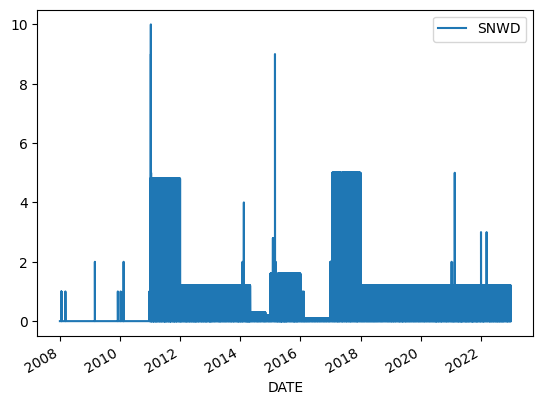

In [33]:
##plotting SNWD to understand the distribution

AL_TES_num[['SNWD']].plot()

In [34]:
# Extracting features (all columns except 'SNOW') and target variable
X = AL_TES_num.drop('SNWD', axis=1)
y = AL_TES_num['SNWD']

# Splitting the data into training and testing sets (80% train, 20% test)
train_size = int(len(y) * 0.8)
X_train, X_test = X.iloc[:train_size, :], X.iloc[train_size:, :]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Check the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (89498, 7) (89498,)
Testing set shape: (22375, 7) (22375,)


Forecast for 2023 (alpha=0.7, beta=0.3):
2023-01-01    0.022596
2023-01-02    0.019036
2023-01-03   -0.015527
2023-01-04    0.007399
2023-01-05   -0.040440
                ...   
2023-12-27   -0.017029
2023-12-28   -0.035661
2023-12-29    0.009924
2023-12-30    0.079477
2023-12-31   -0.023578
Freq: D, Length: 365, dtype: float64


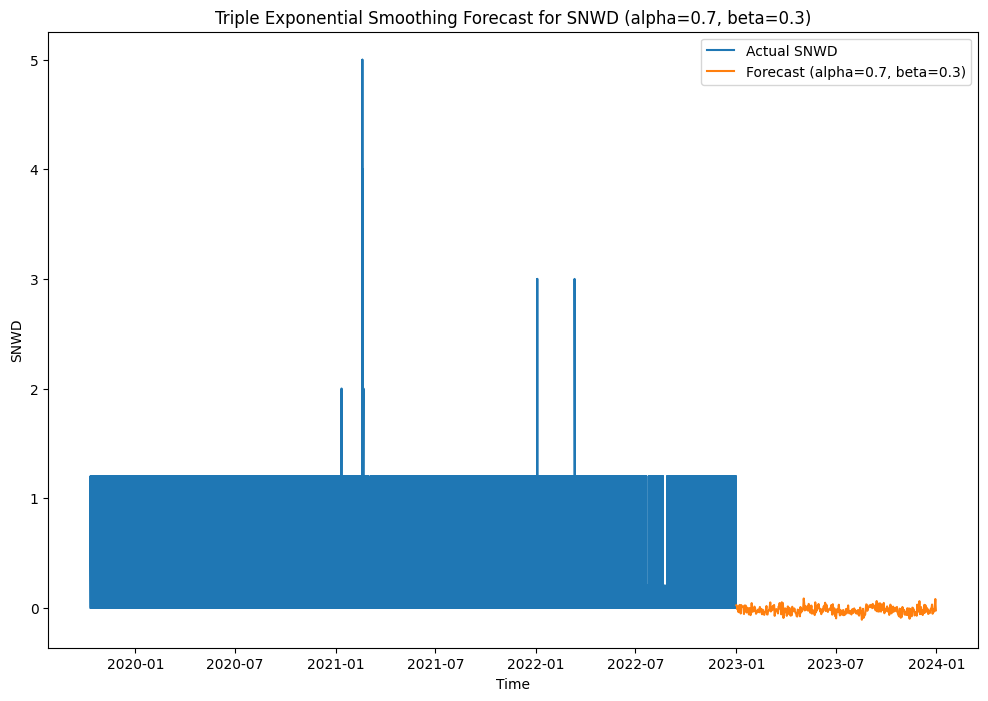

Forecast for 2023 (alpha=0.7, beta=0.2):
2023-01-01    0.022596
2023-01-02    0.019036
2023-01-03   -0.015527
2023-01-04    0.007399
2023-01-05   -0.040440
                ...   
2023-12-27   -0.017029
2023-12-28   -0.035661
2023-12-29    0.009924
2023-12-30    0.079477
2023-12-31   -0.023578
Freq: D, Length: 365, dtype: float64


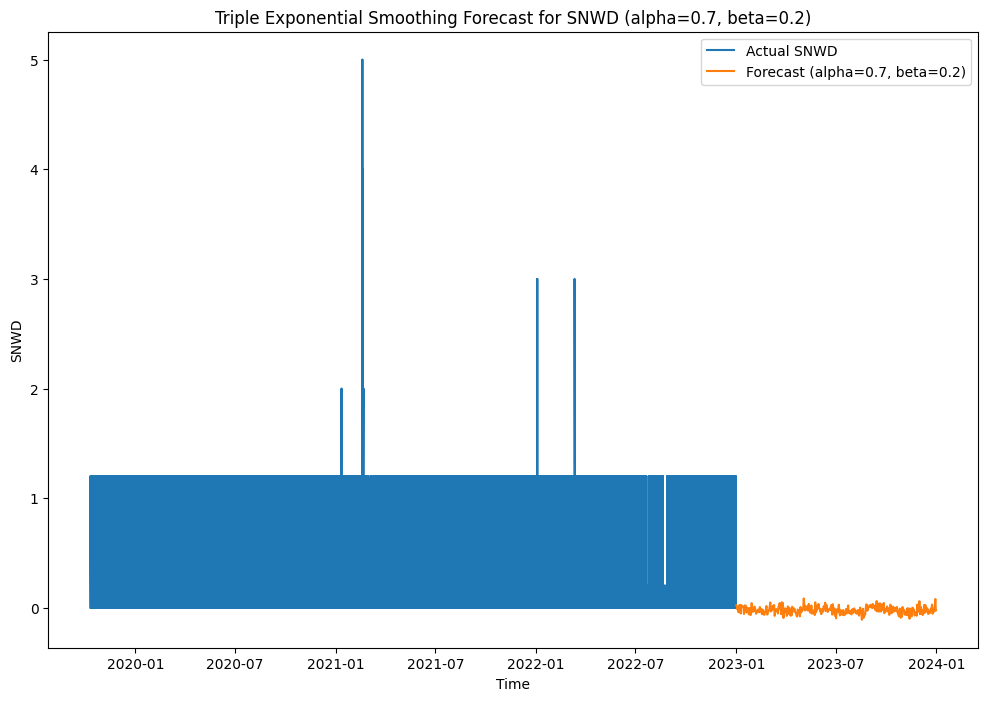

Forecast for 2023 (alpha=0.7, beta=0.1):
2023-01-01    0.022596
2023-01-02    0.019036
2023-01-03   -0.015527
2023-01-04    0.007399
2023-01-05   -0.040440
                ...   
2023-12-27   -0.017029
2023-12-28   -0.035661
2023-12-29    0.009924
2023-12-30    0.079477
2023-12-31   -0.023578
Freq: D, Length: 365, dtype: float64


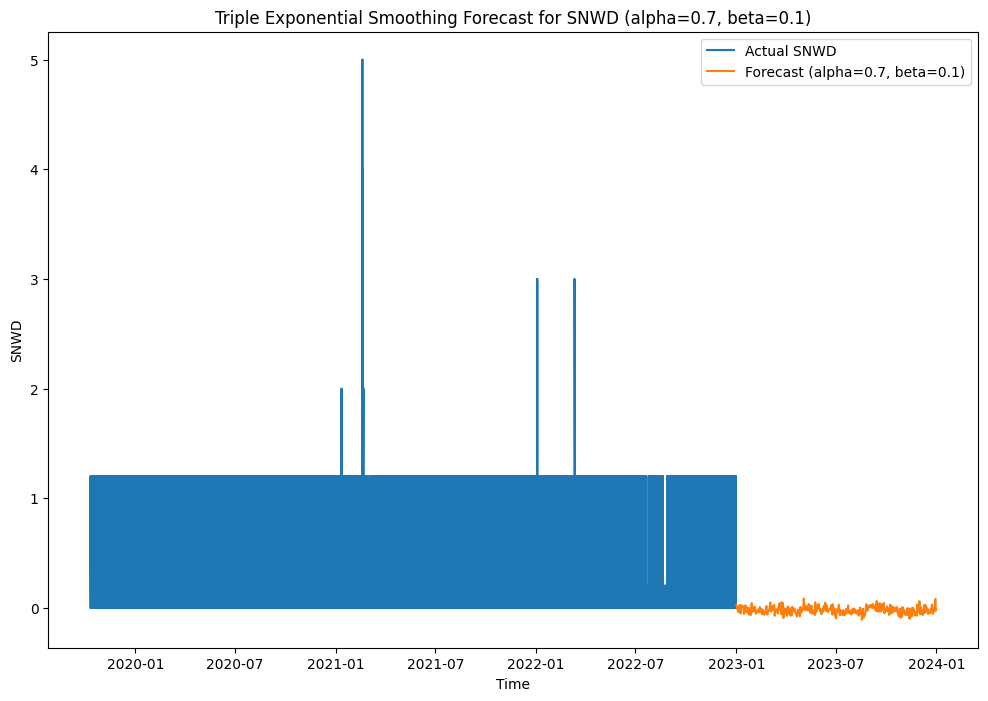

Forecast for 2023 (alpha=0.8, beta=0.3):
2023-01-01    0.011274
2023-01-02   -0.000461
2023-01-03   -0.038709
2023-01-04   -0.019919
2023-01-05   -0.068352
                ...   
2023-12-27   -0.002496
2023-12-28   -0.019131
2023-12-29    0.025988
2023-12-30    0.084966
2023-12-31   -0.017889
Freq: D, Length: 365, dtype: float64


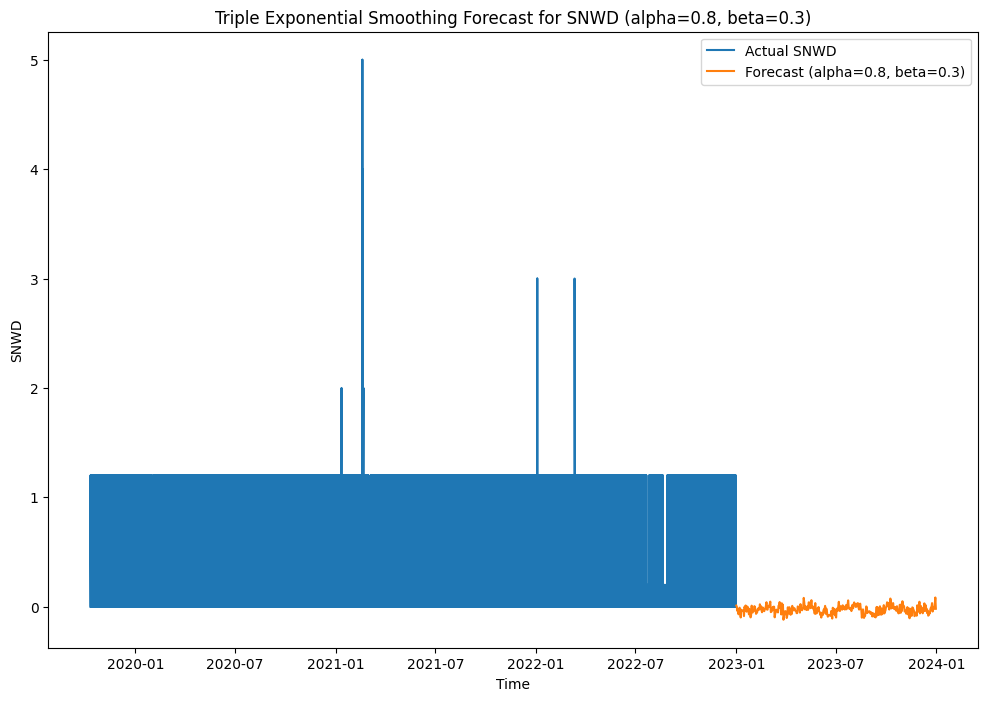

Forecast for 2023 (alpha=0.8, beta=0.2):
2023-01-01    0.011274
2023-01-02   -0.000461
2023-01-03   -0.038709
2023-01-04   -0.019919
2023-01-05   -0.068352
                ...   
2023-12-27   -0.002496
2023-12-28   -0.019131
2023-12-29    0.025988
2023-12-30    0.084966
2023-12-31   -0.017889
Freq: D, Length: 365, dtype: float64


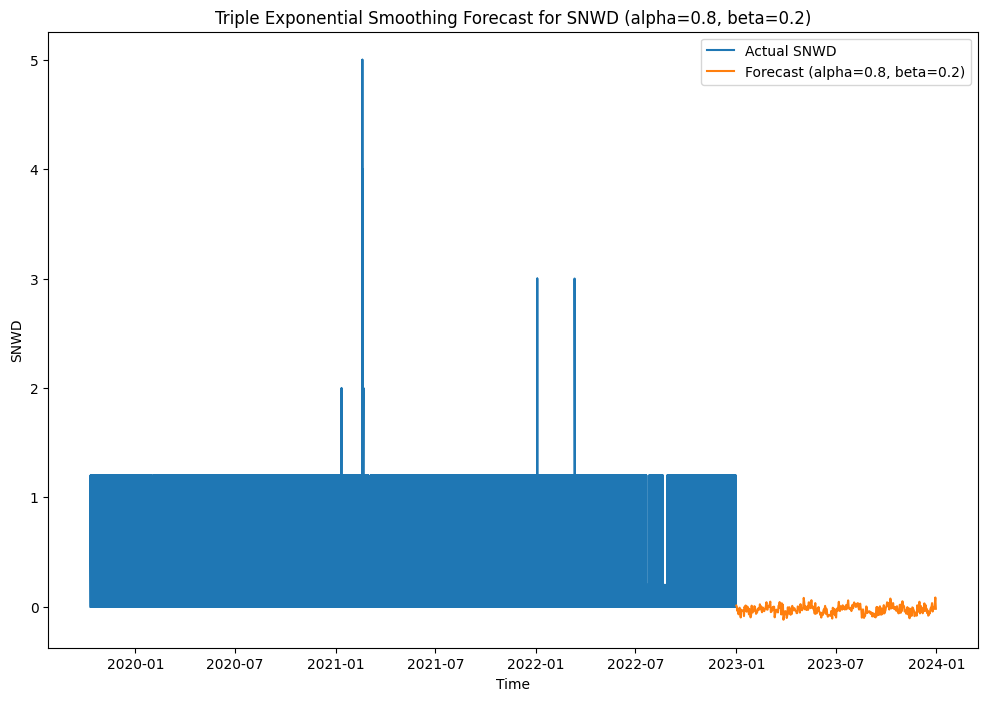

Forecast for 2023 (alpha=0.8, beta=0.1):
2023-01-01    0.011274
2023-01-02   -0.000461
2023-01-03   -0.038709
2023-01-04   -0.019919
2023-01-05   -0.068352
                ...   
2023-12-27   -0.002496
2023-12-28   -0.019131
2023-12-29    0.025988
2023-12-30    0.084966
2023-12-31   -0.017889
Freq: D, Length: 365, dtype: float64


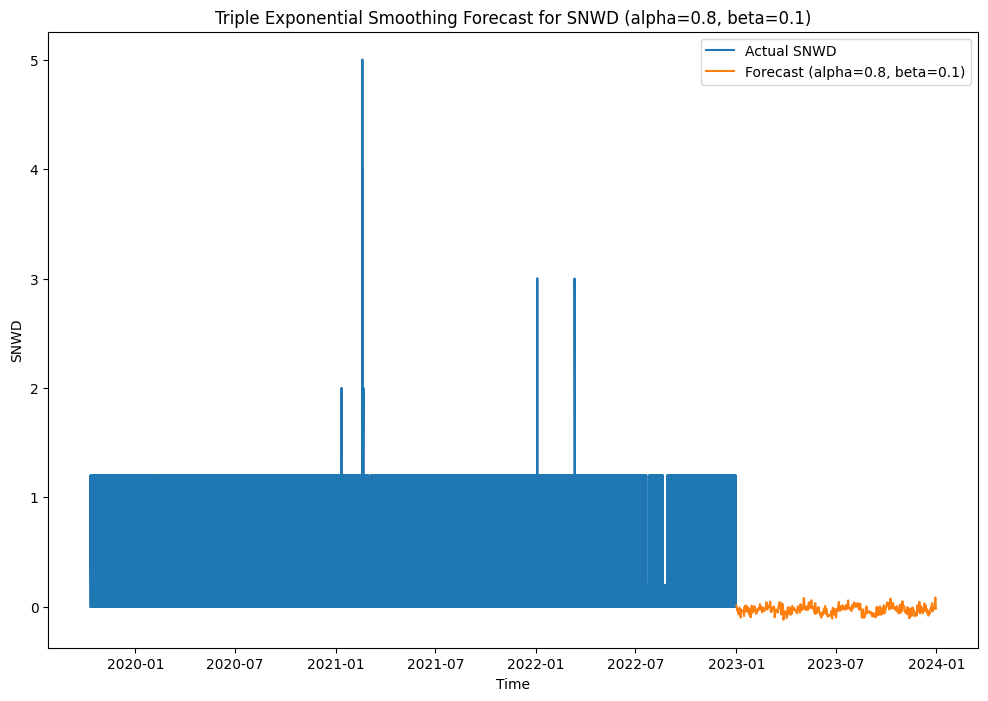

Forecast for 2023 (alpha=0.9, beta=0.3):
2023-01-01    0.037725
2023-01-02    0.038774
2023-01-03    0.016247
2023-01-04    0.048307
2023-01-05    0.008937
                ...   
2023-12-27   -0.012828
2023-12-28   -0.025610
2023-12-29    0.020635
2023-12-30    0.082628
2023-12-31   -0.008452
Freq: D, Length: 365, dtype: float64


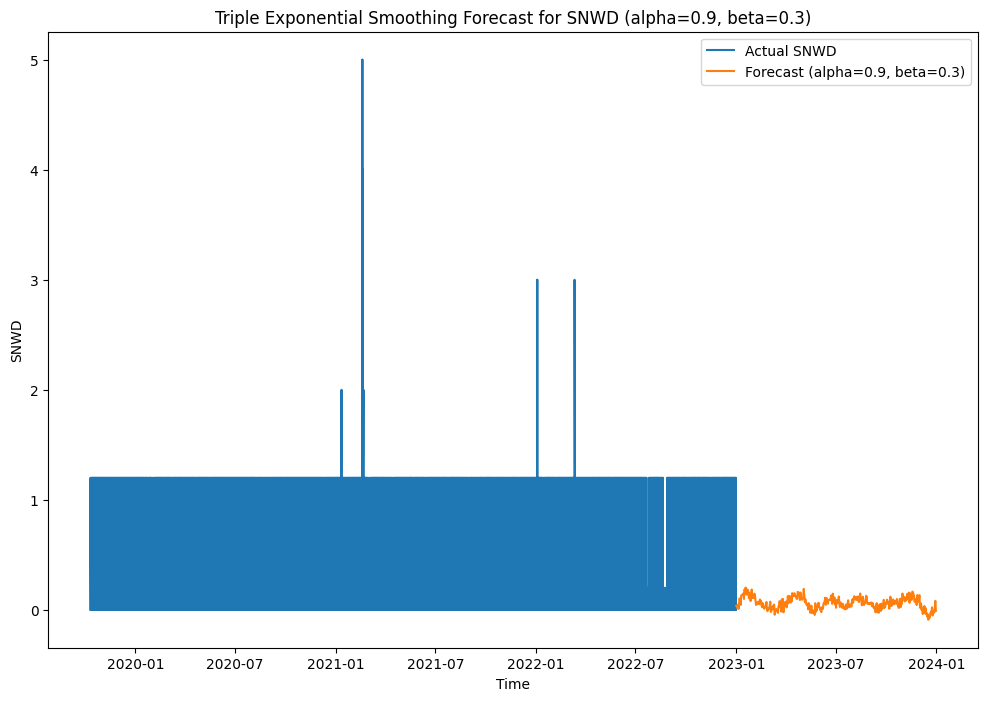

Forecast for 2023 (alpha=0.9, beta=0.2):
2023-01-01    0.037725
2023-01-02    0.038774
2023-01-03    0.016247
2023-01-04    0.048307
2023-01-05    0.008937
                ...   
2023-12-27   -0.012828
2023-12-28   -0.025610
2023-12-29    0.020635
2023-12-30    0.082628
2023-12-31   -0.008452
Freq: D, Length: 365, dtype: float64


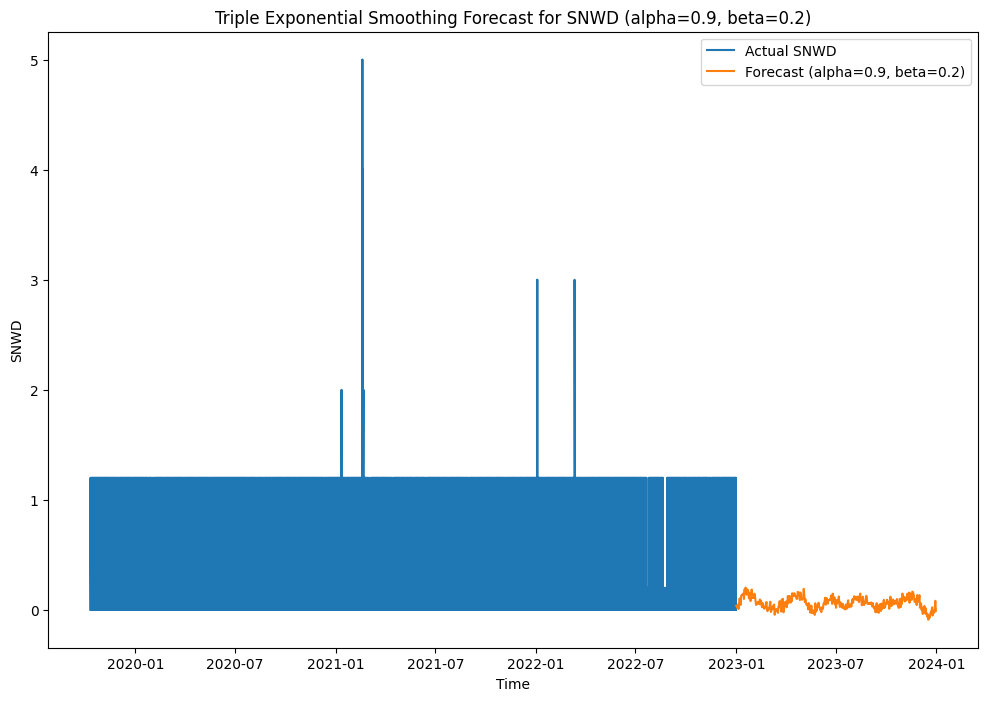

Forecast for 2023 (alpha=0.9, beta=0.1):
2023-01-01    0.037725
2023-01-02    0.038774
2023-01-03    0.016247
2023-01-04    0.048307
2023-01-05    0.008937
                ...   
2023-12-27   -0.012828
2023-12-28   -0.025610
2023-12-29    0.020635
2023-12-30    0.082628
2023-12-31   -0.008452
Freq: D, Length: 365, dtype: float64


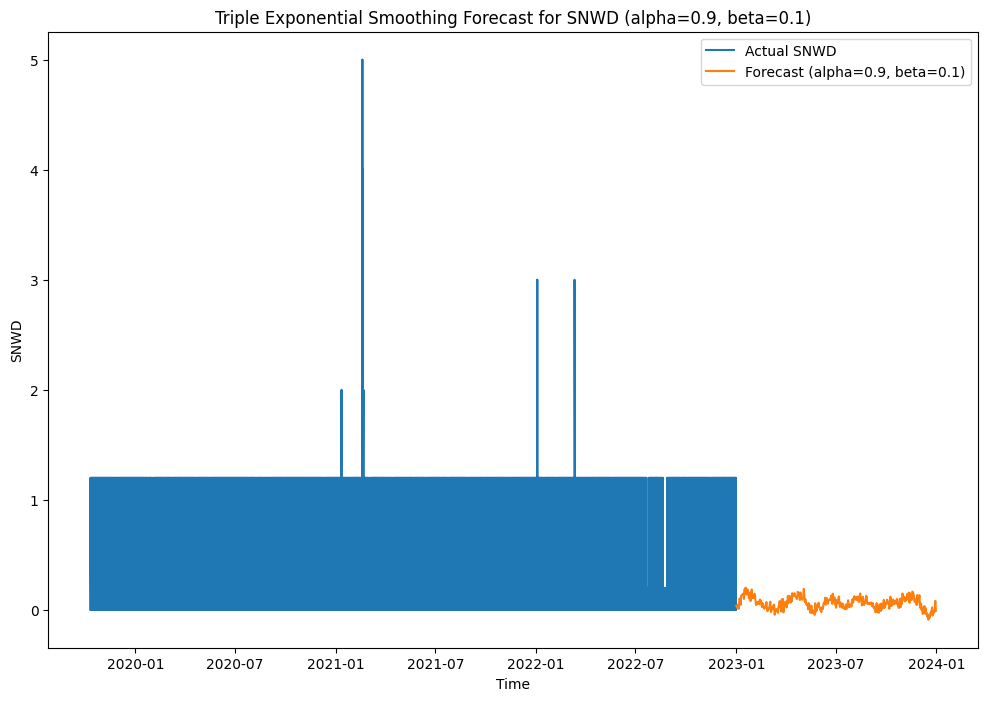

In [35]:
warnings.filterwarnings("ignore")

# Iterate over each combination of alpha and beta values
for alpha in alphas:
    for beta in betas:
        # Train the Triple Exponential Smoothing model on the training set
        model = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=365)
        results = model.fit(smoothing_level=alpha, smoothing_slope=beta)

        # Forecast for 2023
        forecast_steps_2023 = 365
        forecast_2023 = results.forecast(steps=forecast_steps_2023)

        # Set the forecast index to cover the period for 2023
        forecast_index_2023 = pd.date_range(start=y_test.index[-1] + pd.Timedelta(days=1), periods=forecast_steps_2023)
        forecast_2023.index = forecast_index_2023

        # # Print the forecasted values for 2023
        print(f'Forecast for 2023 (alpha={alpha}, beta={beta}):')
        print(forecast_2023)

# Plot the actual values, and forecast for 2023
        plt.figure(figsize=(12, 8))
        plt.plot(y_test.index, y_test, label='Actual SNWD')
        plt.plot(forecast_2023.index, forecast_2023.iloc[:len(y_test)], label=f'Forecast (alpha={alpha}, beta={beta})')  # Ensure the correct length
        # Set title, labels, and legend for the current combination of alpha and beta
        plt.title(f'Triple Exponential Smoothing Forecast for SNWD (alpha={alpha}, beta={beta})')
        plt.xlabel('Time')
        plt.ylabel('SNWD')
        plt.legend()
        plt.show()

In [36]:
# Perform a grid search
for alpha, beta in itertools.product(alphas, betas):
    model_tes = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=seasonal_period, initialization_method="estimated").fit(smoothing_level=alpha, smoothing_trend=beta)
    forecast_tes = model_tes.forecast(steps=len(y_test))  # Use forecast_tes within the loop

    # Evaluate and print metrics for each combination of alpha and beta
    mae = mean_absolute_error(y_test, forecast_tes)
    mse = mean_squared_error(y_test, forecast_tes)
    mape = np.mean(np.abs((y_test.values - forecast_tes.values) / y_test.values)) * 100
    
    print(f"Alpha: {alpha}, Beta: {beta}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%\n")

Alpha: 0.7, Beta: 0.3
Mean Absolute Error: 14.034392519348053
Mean Squared Error: 263.00605942472436
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.7, Beta: 0.2
Mean Absolute Error: 6.134173012249103
Mean Squared Error: 50.33614580927012
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.7, Beta: 0.1
Mean Absolute Error: 13.436445967486556
Mean Squared Error: 240.4032303331131
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.8, Beta: 0.3
Mean Absolute Error: 20.771451499271215
Mean Squared Error: 575.8206161585632
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.8, Beta: 0.2
Mean Absolute Error: 9.596997630413366
Mean Squared Error: 123.05565370408095
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.8, Beta: 0.1
Mean Absolute Error: 11.837586363463219
Mean Squared Error: 186.5833758709199
Mean Absolute Percentage Error (MAPE): inf%

Alpha: 0.9, Beta: 0.3
Mean Absolute Error: 26.63694202150677
Mean Squared Error: 946.7095837489077
Mean Absolute Percentage Error 